# Introduction

This dataset offers a fascinating insight into gender differences in fear-related personality traits and their correlation with physical strength across five university samples. The dataset includes self-report measures of HEXACO Emotionality to explore the effects of physical strength on fear-related personality traits - which is key information to consider when designing interventions for mental health issues. 

## Goal of the notebook
* Thoroughly analyze the notebook and try to see difference in mental health given the genders.
* I will also try to find a way to determine how good the mental health of a student is.
* Answer many questions that arise as I go through each feature.

## Approach
* After the analysis of the whole dataset, I will use an overall dataset. This dataset will contain only few dimensions. Using this, I will try to find clusters. This would be of immense help in identifying students who need immediate help.

# 1. Loading data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [15]:
path = '/kaggle/input/physical-strength-correlation-with-fear-related/'
s1 = pd.read_csv(path+'Sample_1.csv')
s2 = pd.read_csv(path+'Sample_2.csv')
s3 = pd.read_csv(path+'Sample_3.csv')
s4 = pd.read_csv(path+'Sample_4.csv')
s5 = pd.read_csv(path+'Sample_5_corrected.csv')

# There is no need for ids. Each dataset is frome a different university. There is logically no chance of duplicates.
# Hence dropping duplicates because it will create duplicate indices otherwise.
for s in [s1,s2,s3,s4,s5]:
    s.drop('p_id', inplace=True, axis=1)

# 2. Basic Preprocess

Here I will use the input data to create new features. These features will be used for the EDA purpose and possibly for any research ideas. Feel free to use the preprocessed data if you wish.

In [16]:
s1.shape, s2.shape, s3.shape, s4.shape, s5.shape

((175, 45), (209, 43), (370, 21), (340, 19), (305, 20))

In [17]:
s1.columns, s2.columns, s3.columns, s4.columns, s5.columns

(Index(['age', 'female', 'ethnicity', 'grip', 'chest', 'e_anx_1', 'e_anx_2',
        'e_anx_3', 'e_anx_4', 'e_anx_5', 'e_anx_6', 'e_anx_7', 'e_anx_8',
        'e_anx_9', 'e_anx_10', 'e_dep_1', 'e_dep_2', 'e_dep_3', 'e_dep_4',
        'e_dep_5', 'e_dep_6', 'e_dep_7', 'e_dep_8', 'e_dep_9', 'e_dep_10',
        'e_fear_1', 'e_fear_2', 'e_fear_3', 'e_fear_4', 'e_fear_5', 'e_fear_6',
        'e_fear_7', 'e_fear_8', 'e_fear_9', 'e_fear_10', 'e_sen_1', 'e_sen_2',
        'e_sen_3', 'e_sen_4', 'e_sen_5', 'e_sen_6', 'e_sen_7', 'e_sen_8',
        'e_sen_9', 'e_sen_10'],
       dtype='object'),
 Index(['female', 'grip', 'chest', 'e_anx_1', 'e_anx_2', 'e_anx_3', 'e_anx_4',
        'e_anx_5', 'e_anx_6', 'e_anx_7', 'e_anx_8', 'e_anx_9', 'e_anx_10',
        'e_dep_1', 'e_dep_2', 'e_dep_3', 'e_dep_4', 'e_dep_5', 'e_dep_6',
        'e_dep_7', 'e_dep_8', 'e_dep_9', 'e_dep_10', 'e_fear_1', 'e_fear_2',
        'e_fear_3', 'e_fear_4', 'e_fear_5', 'e_fear_6', 'e_fear_7', 'e_fear_8',
        'e_fear_9', 'e_fe

It seems that s1 and s2 have similar columns. s3, s4 and s5 have similar columns. I will create 2 new dataframes by preprocessing these values into new features. It is better to show EDA of these two newly created dataframes seperately because otherwise it will create too many null values

df_1 and df_2 will be used to show EDA for each feature. This will be useful identifying various personality traits and the distributions of mental health for students across genders.

In [18]:
df_1 = pd.concat([s1, s2], axis = 0, ignore_index=True)
df_1.drop(['age','ethnicity'], inplace=True, axis=1)
df_1['gender'] = df_1.female.map({0:'Male',1:'Female'})
df_1.drop('female',inplace=True, axis=1)

df_2 = pd.concat([s3, s4, s5], axis = 0, ignore_index=True)
df_2.drop(['chest','ethnicity'], inplace=True, axis=1)
df_2['gender'] = df_2.female.map({0:'Male',1:'Female'})
df_2.drop('female',inplace=True, axis=1)

# 2.1 Preprocess - S1 and S2

Preprocess will be the name of a dataset of s1 and s2 values. Here I will take overall values of appropriate features inorder to reduce dimensions. This will greately help in clustering and also understanding the distribution in a general context.

In [19]:
preprocess = pd.DataFrame()

In [20]:
# row wise stats of appropriate features grouped together

preprocess['good_anx_mean'] = df_1.iloc[:,2:7].mean(axis=1)
preprocess['good_anx_std'] = df_1.iloc[:,2:7].std(axis=1)
preprocess['good_anx_median'] = df_1.iloc[:,2:7].median(axis=1)
preprocess['good_anx_max'] = df_1.iloc[:,2:7].max(axis=1)
preprocess['good_anx_min'] = df_1.iloc[:,2:7].min(axis=1)
preprocess['good_anx_mode'] = df_1.iloc[:,2:7].mode(axis=1)[0]

preprocess['bad_anx_mean'] = df_1.iloc[:,7:12].mean(axis=1)
preprocess['bad_anx_std'] = df_1.iloc[:,7:12].std(axis=1)
preprocess['bad_anx_median'] = df_1.iloc[:,7:12].median(axis=1)
preprocess['bad_anx_max'] = df_1.iloc[:,7:12].max(axis=1)
preprocess['bad_anx_min'] = df_1.iloc[:,7:12].min(axis=1)
preprocess['bad_anx_mode'] = df_1.iloc[:,7:12].mode(axis=1)[0]

preprocess['good_dep_mean'] = df_1.iloc[:,17:19].mean(axis=1)
preprocess['good_dep_std'] = df_1.iloc[:,17:19].std(axis=1)
preprocess['good_dep_median'] = df_1.iloc[:,17:19].median(axis=1)
preprocess['good_dep_max'] = df_1.iloc[:,17:19].max(axis=1)
preprocess['good_dep_min'] = df_1.iloc[:,17:19].min(axis=1)
preprocess['good_dep_mode'] = df_1.iloc[:,17:19].mode(axis=1)[0]

cols = df_1.iloc[:,12:22].columns.difference(df_1.iloc[:,17:20].columns)
preprocess['bad_dep_mean'] = df_1.loc[:,cols].mean(axis=1)
preprocess['bad_dep_std'] = df_1.loc[:,cols].std(axis=1)
preprocess['bad_dep_median'] = df_1.loc[:,cols].median(axis=1)
preprocess['bad_dep_max'] = df_1.loc[:,cols].max(axis=1)
preprocess['bad_dep_min'] = df_1.loc[:,cols].min(axis=1)
preprocess['bad_dep_mode'] = df_1.loc[:,cols].mode(axis=1)[0]

cols = ['e_fear_1','e_fear_6','e_fear_8']
preprocess['bad_fear_mean'] = df_1.loc[:,cols].mean(axis=1)
preprocess['bad_fear_std'] = df_1.loc[:,cols].std(axis=1)
preprocess['bad_fear_median'] = df_1.loc[:,cols].median(axis=1)
preprocess['bad_fear_max'] = df_1.loc[:,cols].max(axis=1)
preprocess['bad_fear_min'] = df_1.loc[:,cols].min(axis=1)
preprocess['bad_fear_mode'] = df_1.loc[:,cols].mode(axis=1)[0]

cols = ['e_sen_1','e_sen_2','e_fear_4','e_fear_5','e_fear_7','e_fear_9','e_fear_10']
preprocess['other_fear_mean'] = df_1.loc[:,cols].mean(axis=1)
preprocess['other_fear_std'] = df_1.loc[:,cols].std(axis=1)
preprocess['other_fear_median'] = df_1.loc[:,cols].median(axis=1)
preprocess['other_fear_max'] = df_1.loc[:,cols].max(axis=1)
preprocess['other_fear_min'] = df_1.loc[:,cols].min(axis=1)
preprocess['other_fear_mode'] = df_1.loc[:,cols].mode(axis=1)[0]

preprocess['pos_sen_mean'] = df_1.iloc[:,-11:-6].mean(axis=1)
preprocess['pos_sen_std'] = df_1.iloc[:,-11:-6].std(axis=1)
preprocess['pos_sen_median'] = df_1.iloc[:,-11:-6].median(axis=1)
preprocess['pos_sen_max'] = df_1.iloc[:,-11:-6].max(axis=1)
preprocess['pos_sen_min'] = df_1.iloc[:,-11:-6].min(axis=1)
preprocess['pos_sen_mode'] = df_1.iloc[:,-11:-6].mode(axis=1)[0]

preprocess['neg_sen_mean'] = df_1.iloc[:,-6:-1].mean(axis=1)
preprocess['neg_sen_std'] = df_1.iloc[:,-6:-1].std(axis=1)
preprocess['neg_sen_median'] = df_1.iloc[:,-6:-1].median(axis=1)
preprocess['neg_sen_max'] = df_1.iloc[:,-6:-1].max(axis=1)
preprocess['neg_sen_min'] = df_1.iloc[:,-6:-1].min(axis=1)
preprocess['neg_sen_mode'] = df_1.iloc[:,-6:-1].mode(axis=1)[0]

# 2.2 Preprocess - S3, S4 and S5

This is same as above but for the remaining 3 datasets

In [21]:
preprocess_2 = pd.DataFrame()

In [22]:
# row wise stats of appropriate features grouped together

preprocess_2['hex_mean'] = df_1.iloc[:,2:7].mean(axis=1)
preprocess_2['hex_std'] = df_1.iloc[:,2:7].std(axis=1)
preprocess_2['hex_median'] = df_1.iloc[:,2:7].median(axis=1)
preprocess_2['hex_max'] = df_1.iloc[:,2:7].max(axis=1)
preprocess_2['hex_min'] = df_1.iloc[:,2:7].min(axis=1)
preprocess_2['hex_mode'] = df_1.iloc[:,2:7].mode(axis=1)[0]

## 2.3 Check for any null values

In [23]:
df_1.isnull().sum()

grip         0
chest        2
e_anx_1      0
e_anx_2      0
e_anx_3      0
e_anx_4      0
e_anx_5      0
e_anx_6      0
e_anx_7      0
e_anx_8      0
e_anx_9      0
e_anx_10     0
e_dep_1      0
e_dep_2      0
e_dep_3      0
e_dep_4      0
e_dep_5      0
e_dep_6      0
e_dep_7      0
e_dep_8      0
e_dep_9      0
e_dep_10     0
e_fear_1     0
e_fear_2     0
e_fear_3     0
e_fear_4     0
e_fear_5     0
e_fear_6     0
e_fear_7     0
e_fear_8     0
e_fear_9     0
e_fear_10    0
e_sen_1      0
e_sen_2      0
e_sen_3      0
e_sen_4      0
e_sen_5      0
e_sen_6      0
e_sen_7      0
e_sen_8      0
e_sen_9      0
e_sen_10     0
gender       0
dtype: int64

In [24]:
df_2.isnull().sum()

age       13
grip       0
hex_5      2
hex_11     0
hex_17     0
hex_23     0
hex_29     0
hex_35     0
hex_41     0
hex_47     0
hex_53     1
hex_59     1
hex_65     0
hex_71     2
hex_77     1
hex_83     0
hex_89     0
hex_95     0
gender     0
dtype: int64

There are few missing value. However, I will not do anything to these null values. It will not impact the performance or visualizations. I will not be using 'age' column anyway in my analysis.

In [25]:
preprocess.isnull().any().sum()

0

In [26]:
preprocess_2.isnull().any().sum()

0

There are no null value in dataframe created.

# 3. EDA

In this section, I will visualize all the important aspects of the dataset. Please let me know for any improvements or observation I might have missed.

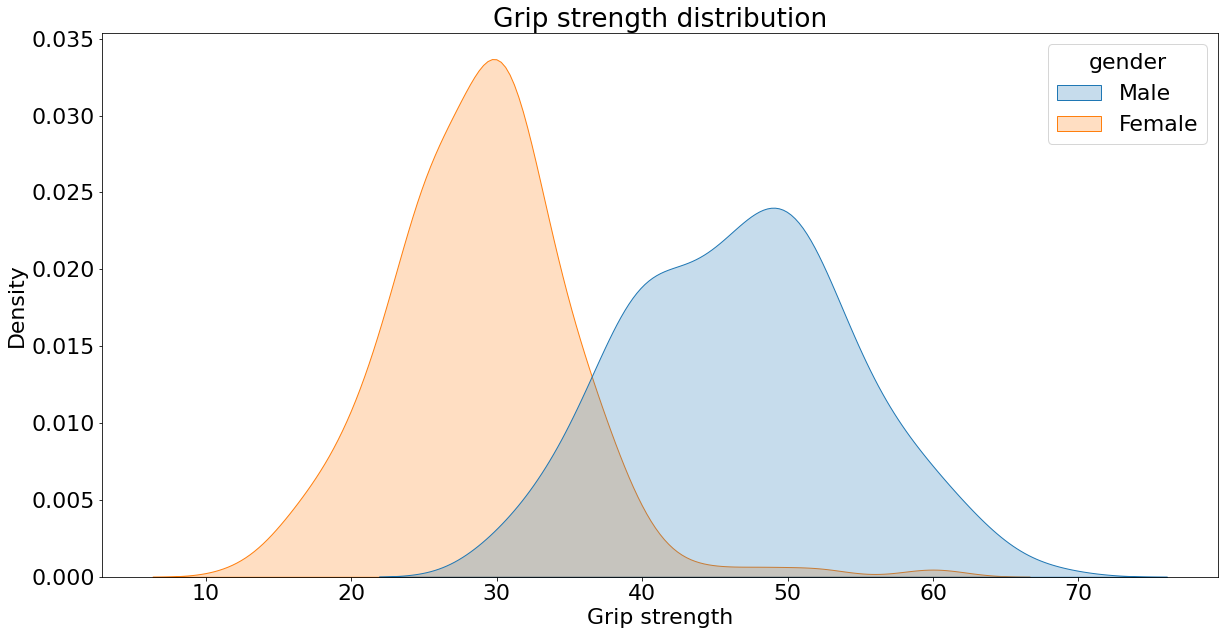

In [27]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='grip',hue='gender', fill=True)
plt.title('Grip strength distribution')
plt.xlabel('Grip strength')
plt.show()

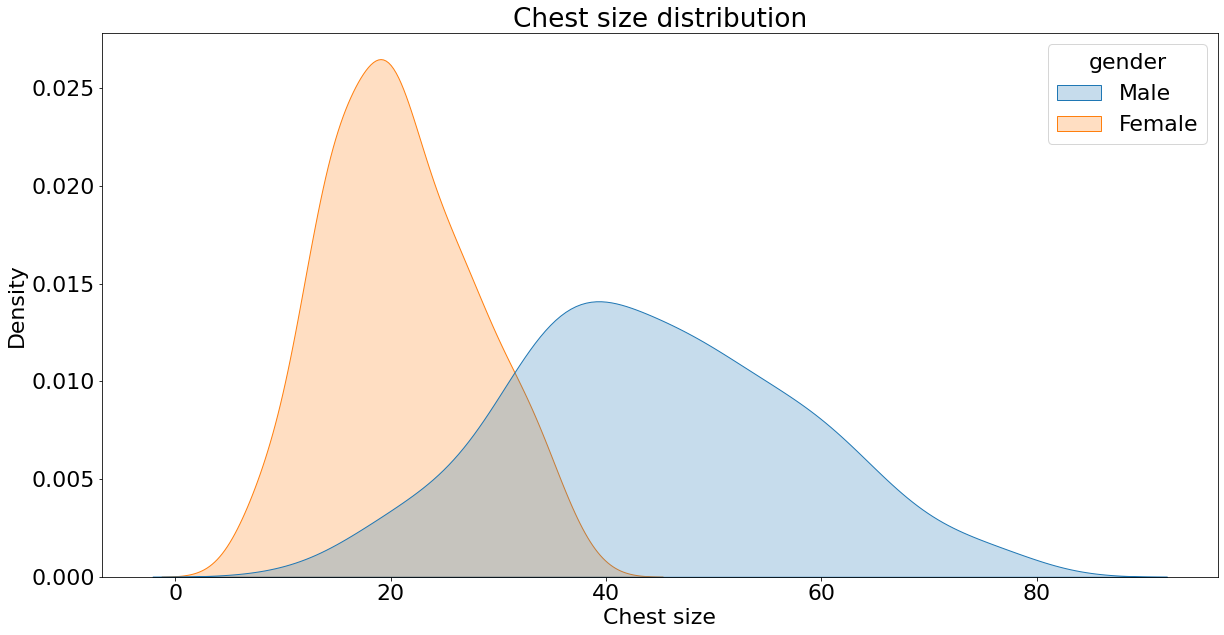

In [28]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='chest',hue='gender', fill=True)
plt.title('Chest size distribution')
plt.xlabel('Chest size')
plt.show()

# 3.1 EDA - Anxiety

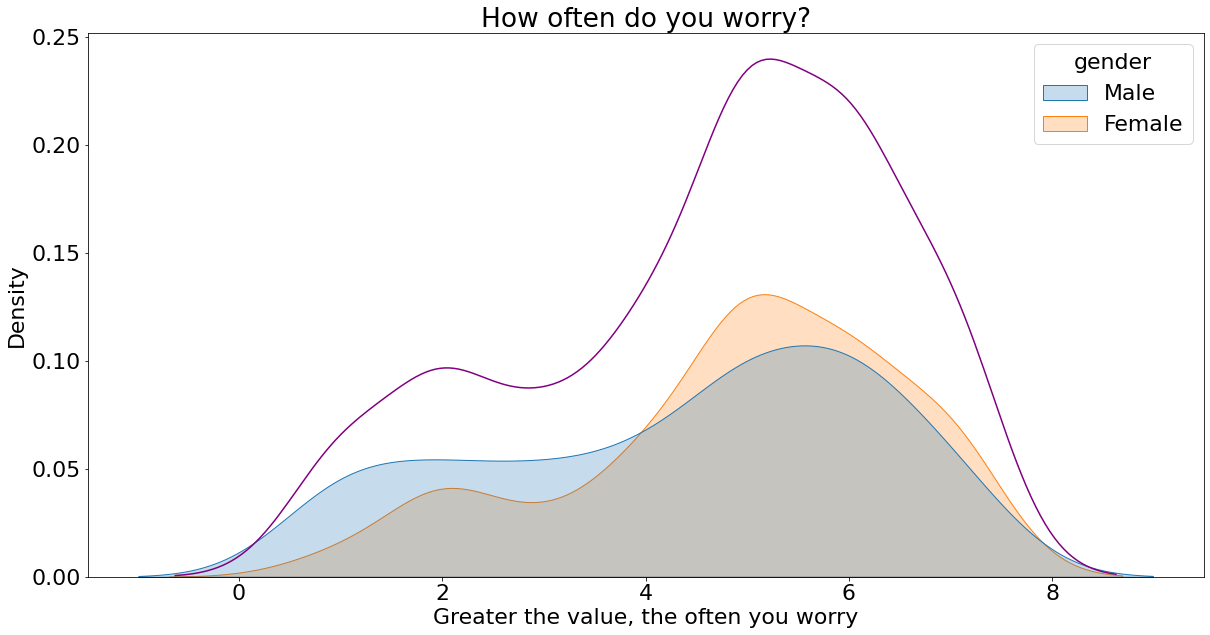

In [29]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_anx_1',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_anx_1', label='Overall', color='purple')
plt.title('How often do you worry?')
plt.xlabel('Greater the value, the often you worry')
plt.show()

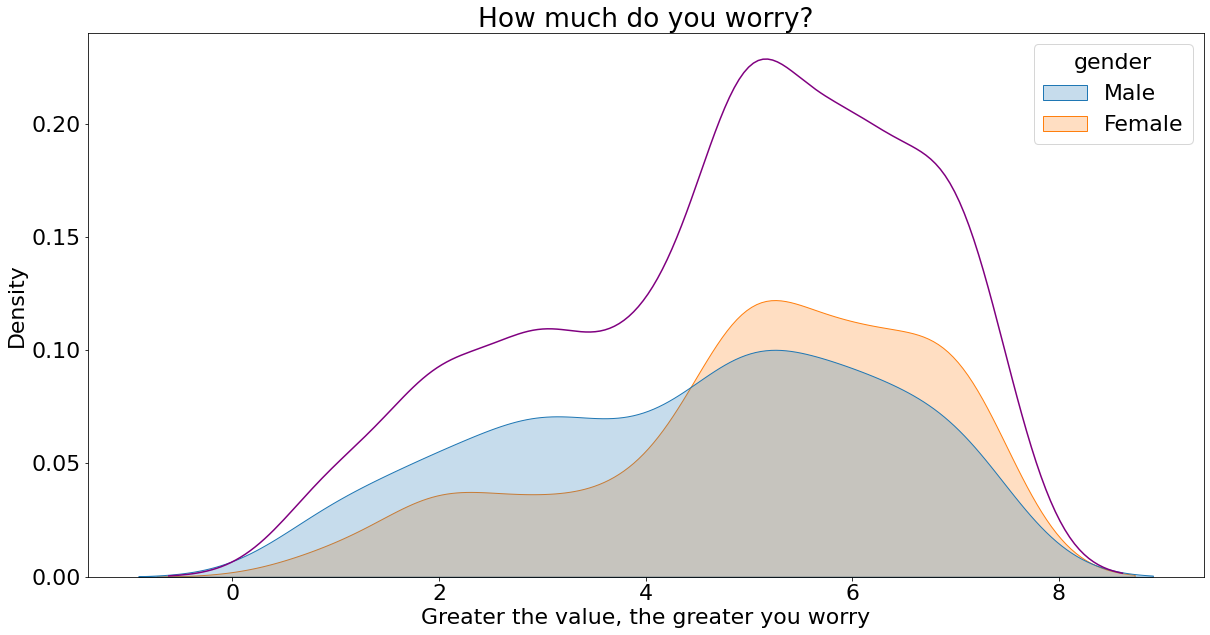

In [30]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_anx_2',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_anx_2', label='Overall', color='purple')
plt.title('How much do you worry?')
plt.xlabel('Greater the value, the greater you worry')
plt.show()

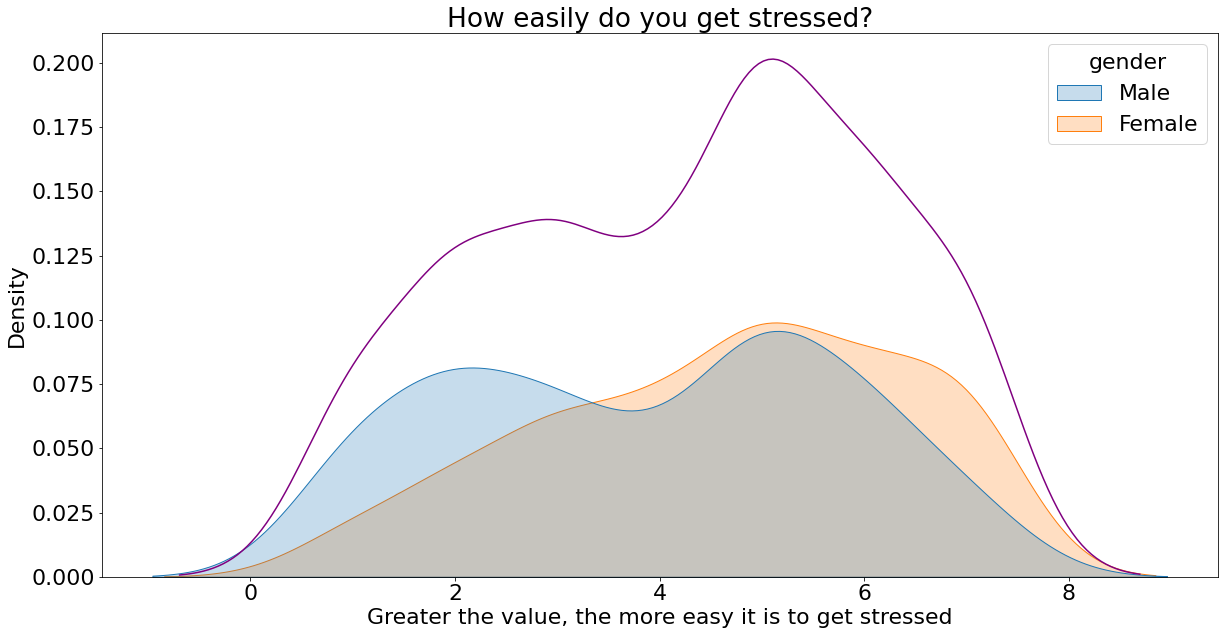

In [31]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_anx_3',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_anx_3', label='Overall', color='purple')
plt.title('How easily do you get stressed?')
plt.xlabel('Greater the value, the more easy it is to get stressed')
plt.show()

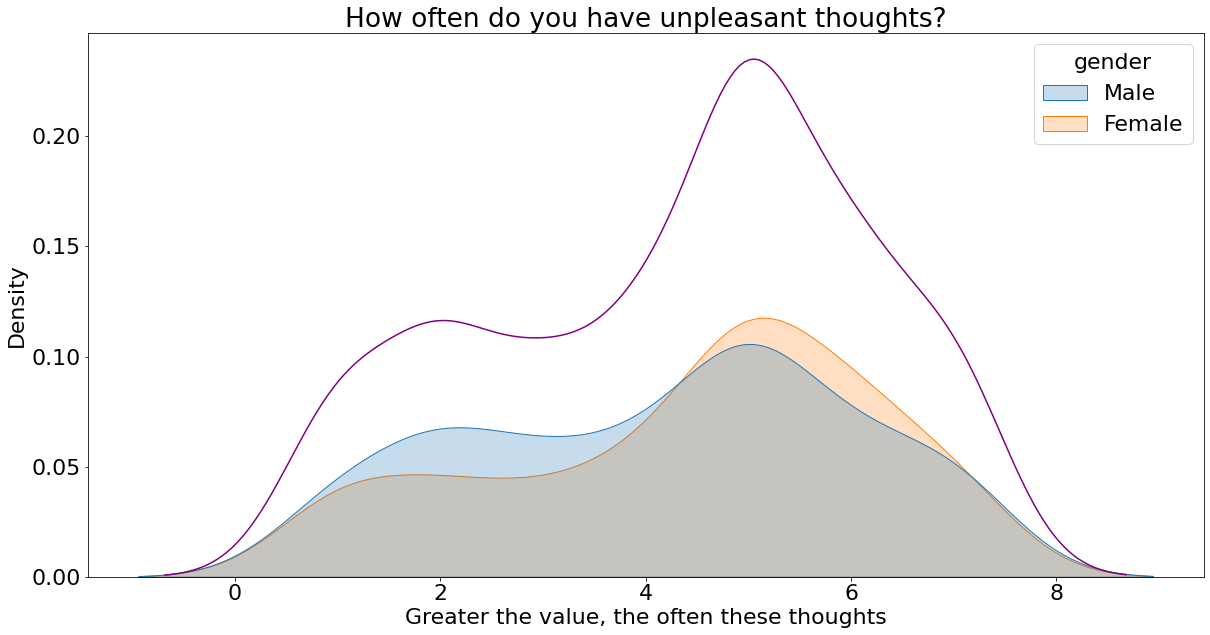

In [32]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_anx_4',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_anx_4', label='Overall', color='purple')
plt.title('How often do you have unpleasant thoughts?')
plt.xlabel('Greater the value, the often these thoughts')
plt.show()

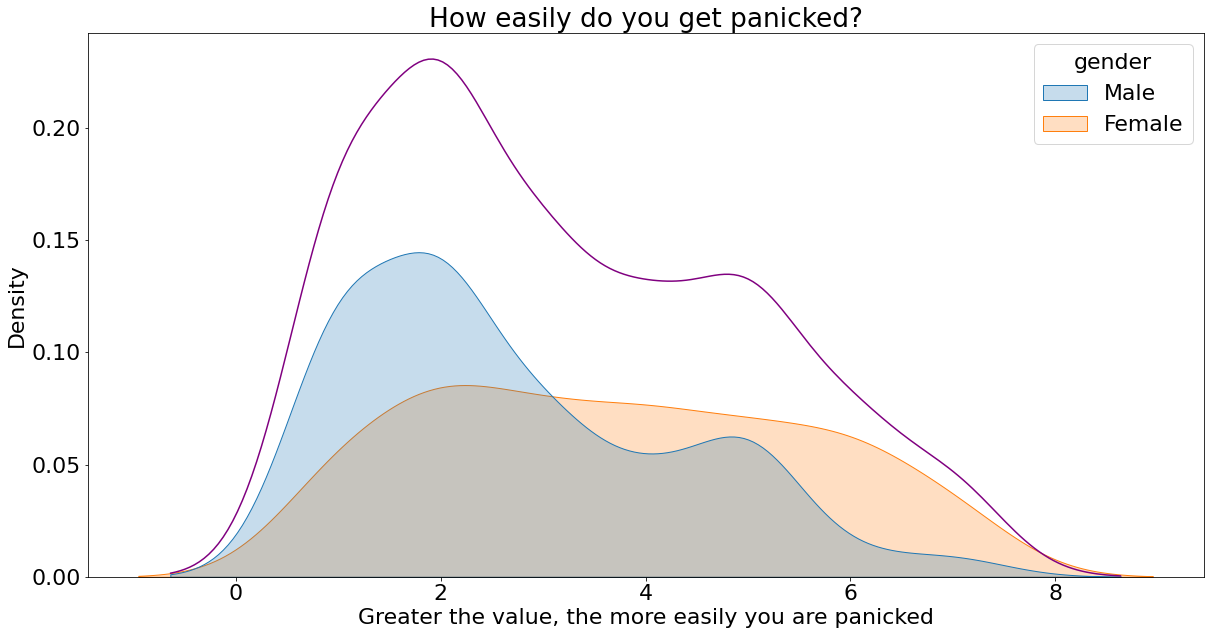

In [33]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_anx_5',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_anx_5', label='Overall', color='purple')
plt.title('How easily do you get panicked?')
plt.xlabel('Greater the value, the more easily you are panicked')
plt.show()

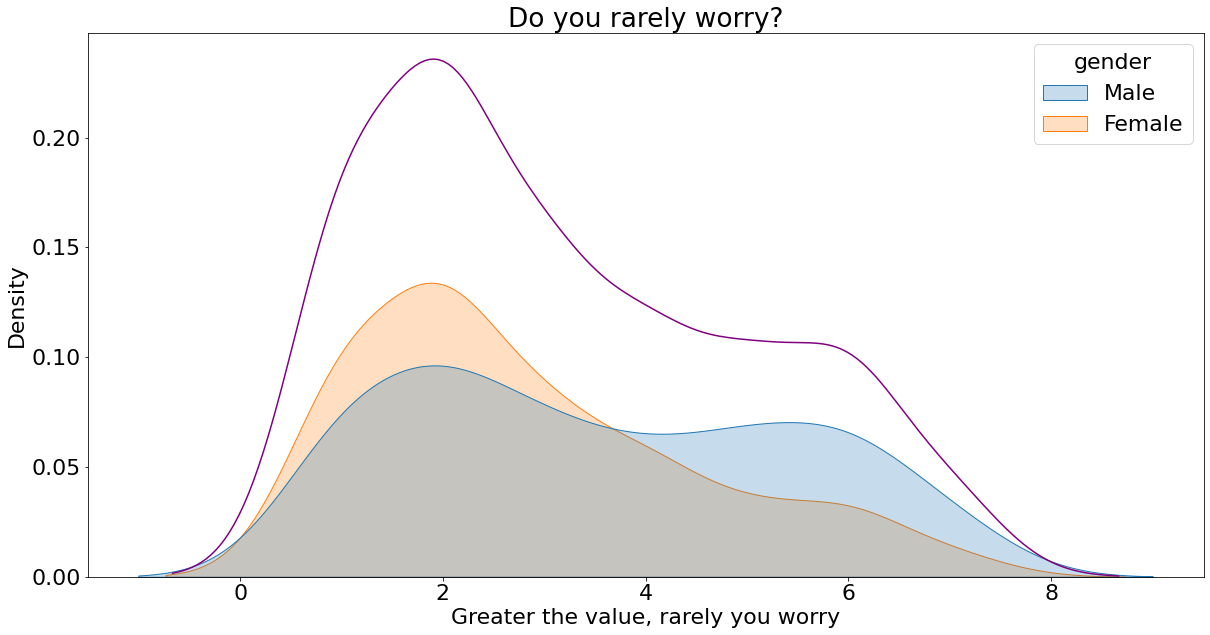

In [34]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_anx_6',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_anx_6', label='Overall', color='purple')
plt.title('Do you rarely worry?')
plt.xlabel('Greater the value, rarely you worry')
plt.show()

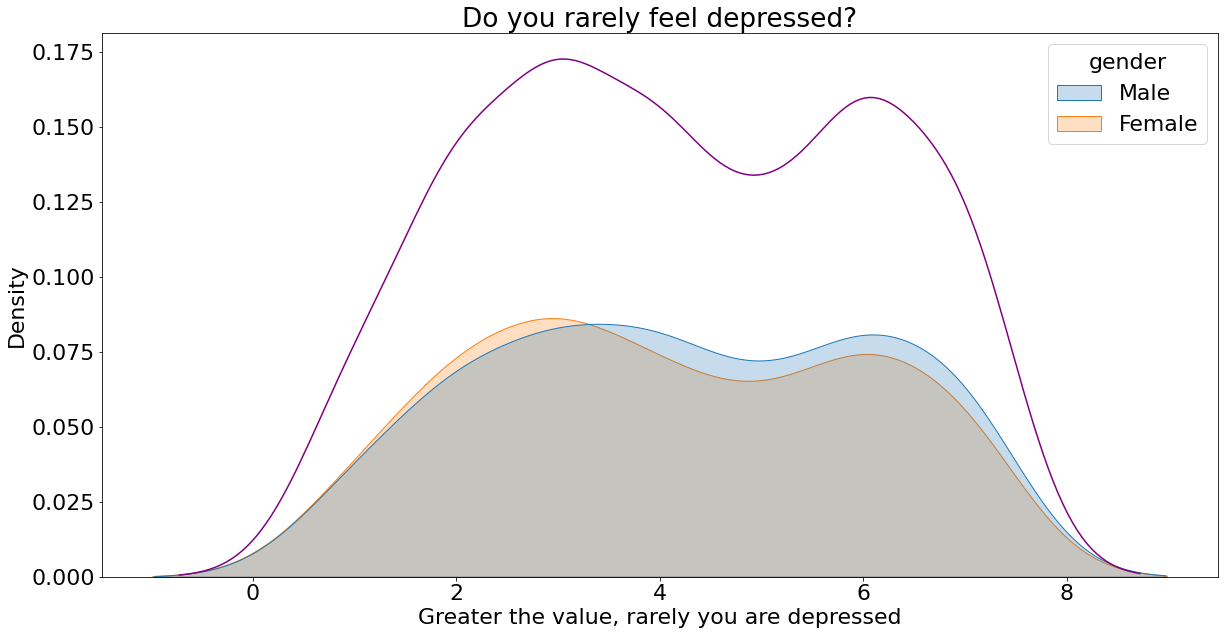

In [35]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_anx_7',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_anx_7', label='Overall', color='purple')
plt.title('Do you rarely feel depressed?')
plt.xlabel('Greater the value, rarely you are depressed')
plt.show()

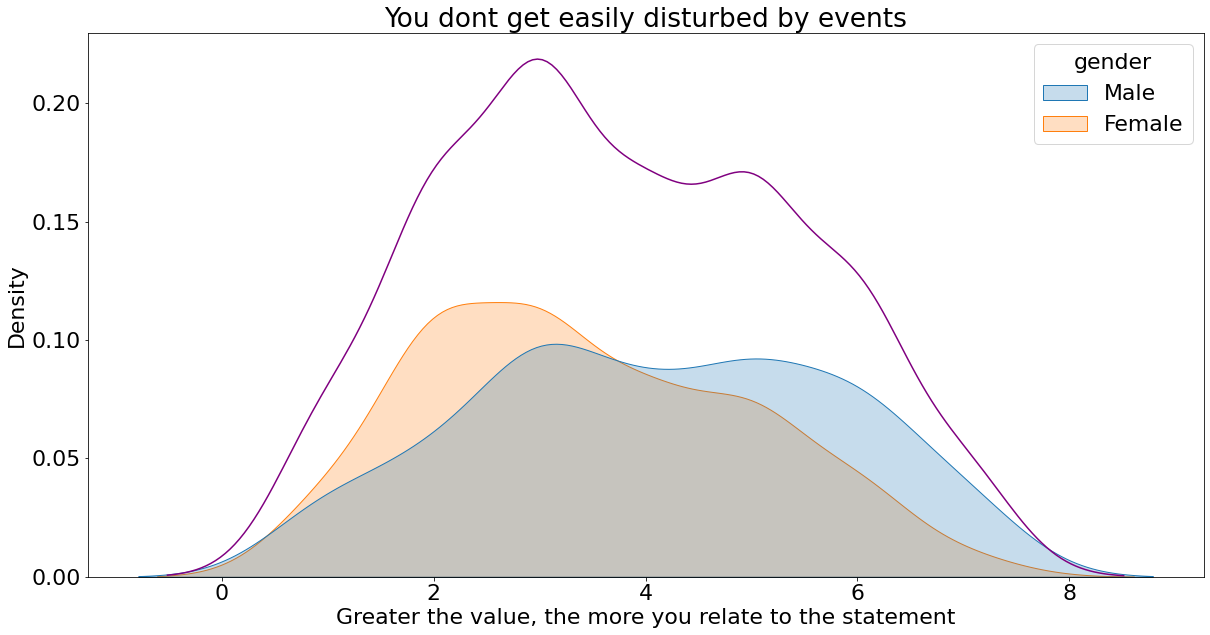

In [36]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_anx_8',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_anx_8', label='Overall', color='purple')
plt.title('You dont get easily disturbed by events')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

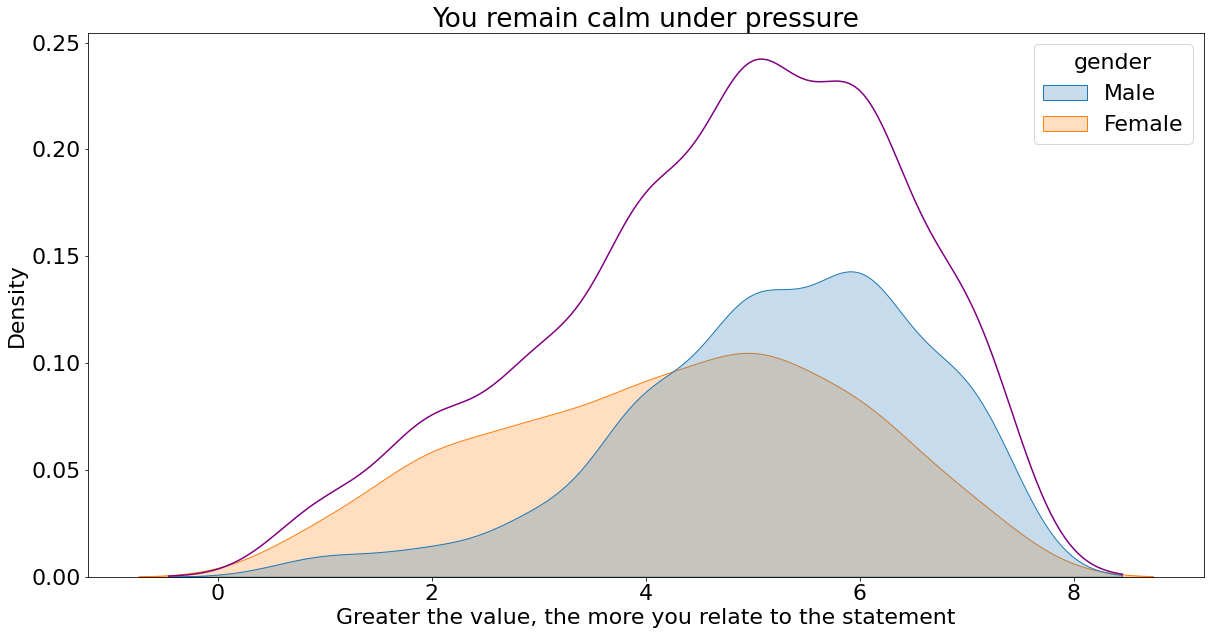

In [37]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_anx_9',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_anx_9' ,label='Overall', color='purple')
plt.title('You remain calm under pressure')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

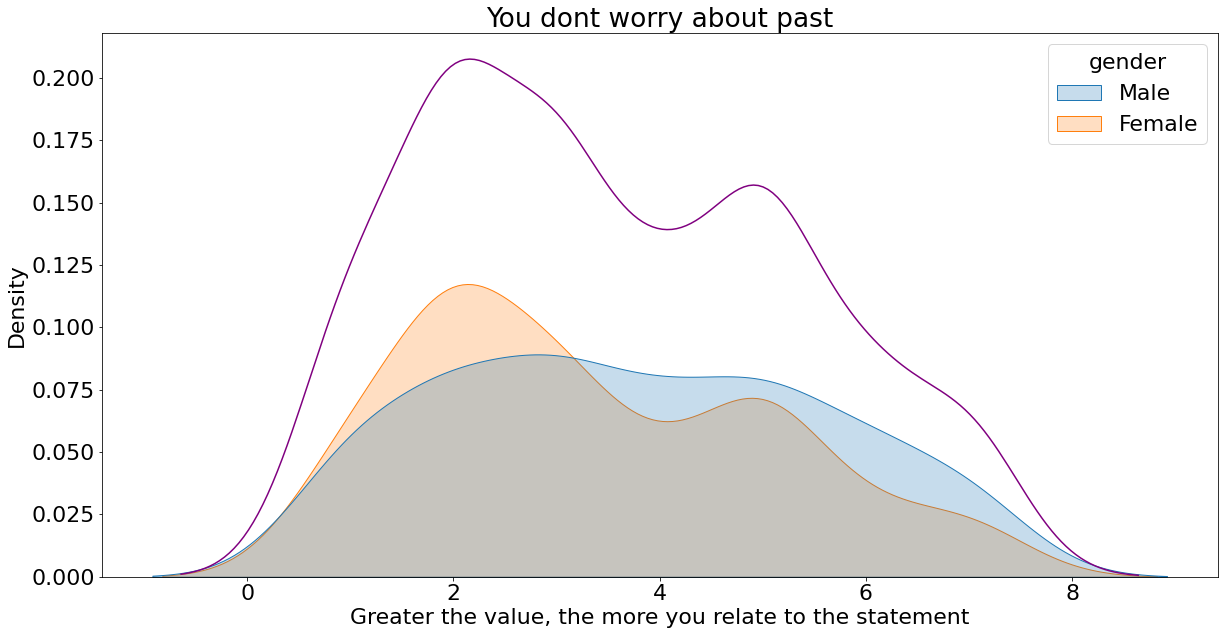

In [38]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_anx_10',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_anx_10' ,label='Overall', color='purple')
plt.title('You dont worry about past')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

# 3.2 Emotional Dependence - EDA

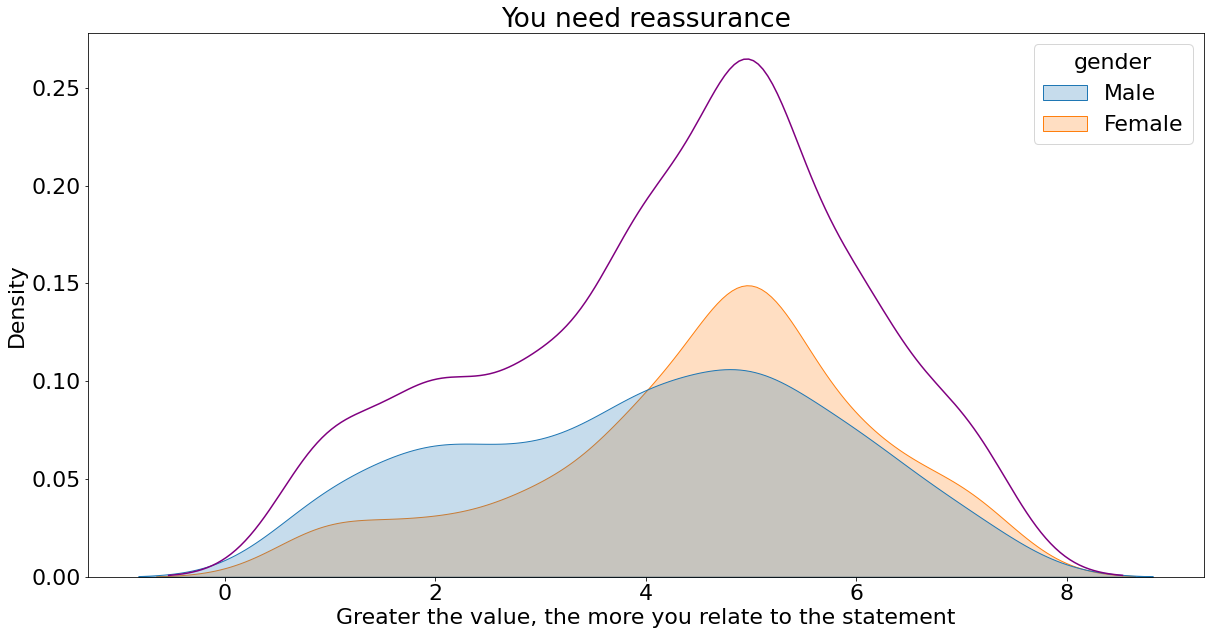

In [39]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_dep_1',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_dep_1' ,label='Overall', color='purple')
plt.title('You need reassurance')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

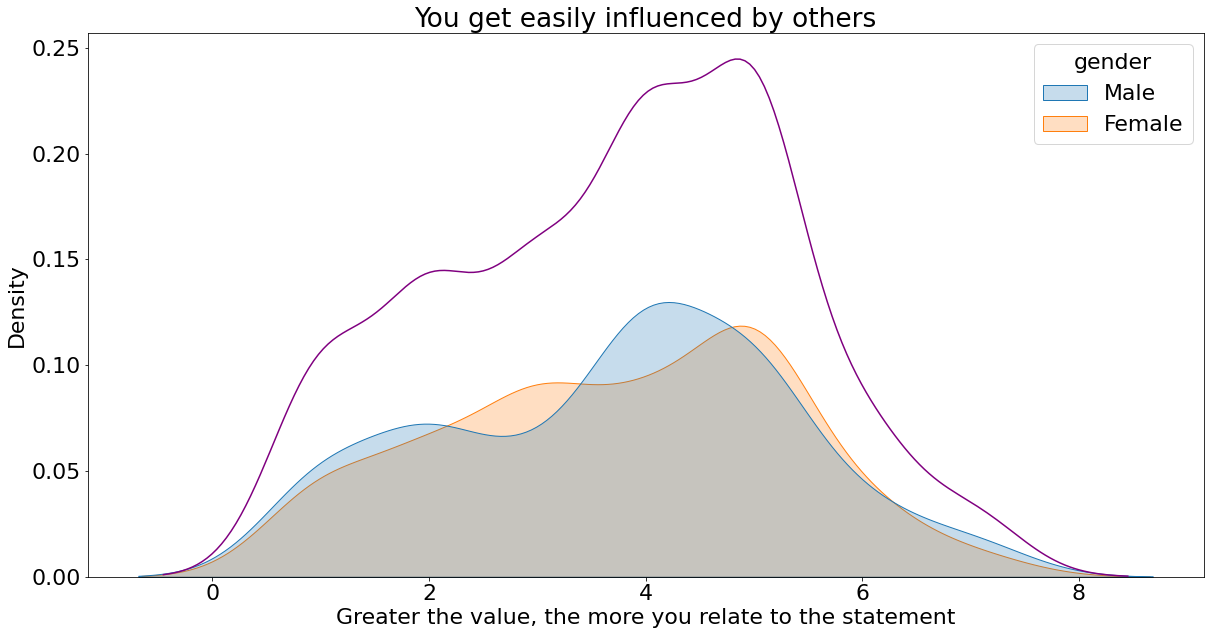

In [40]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_dep_2',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_dep_2' ,label='Overall', color='purple')
plt.title('You get easily influenced by others')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

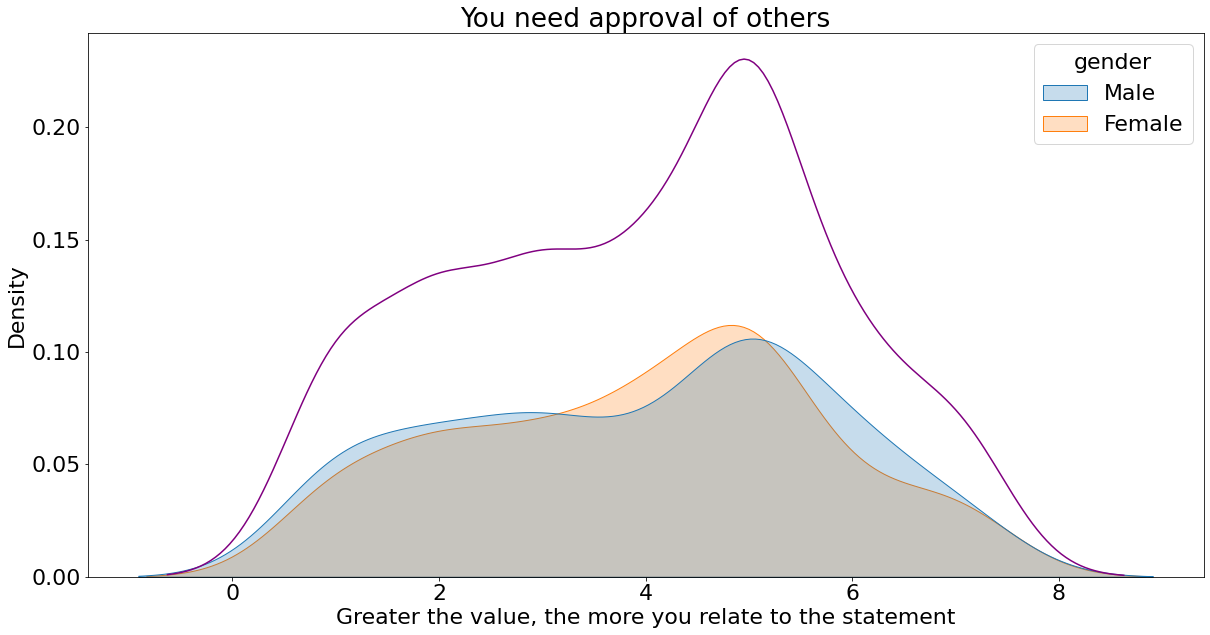

In [41]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_dep_3',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_dep_3' ,label='Overall', color='purple')
plt.title('You need approval of others')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

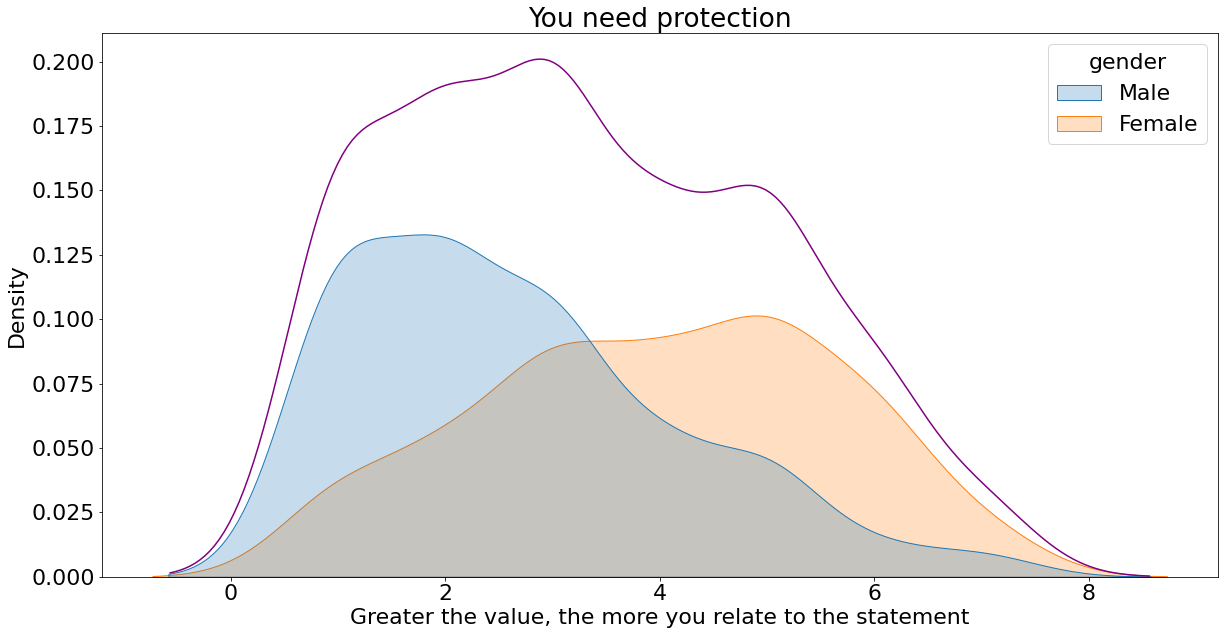

In [42]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_dep_4',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_dep_4' ,label='Overall', color='purple')
plt.title('You need protection')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

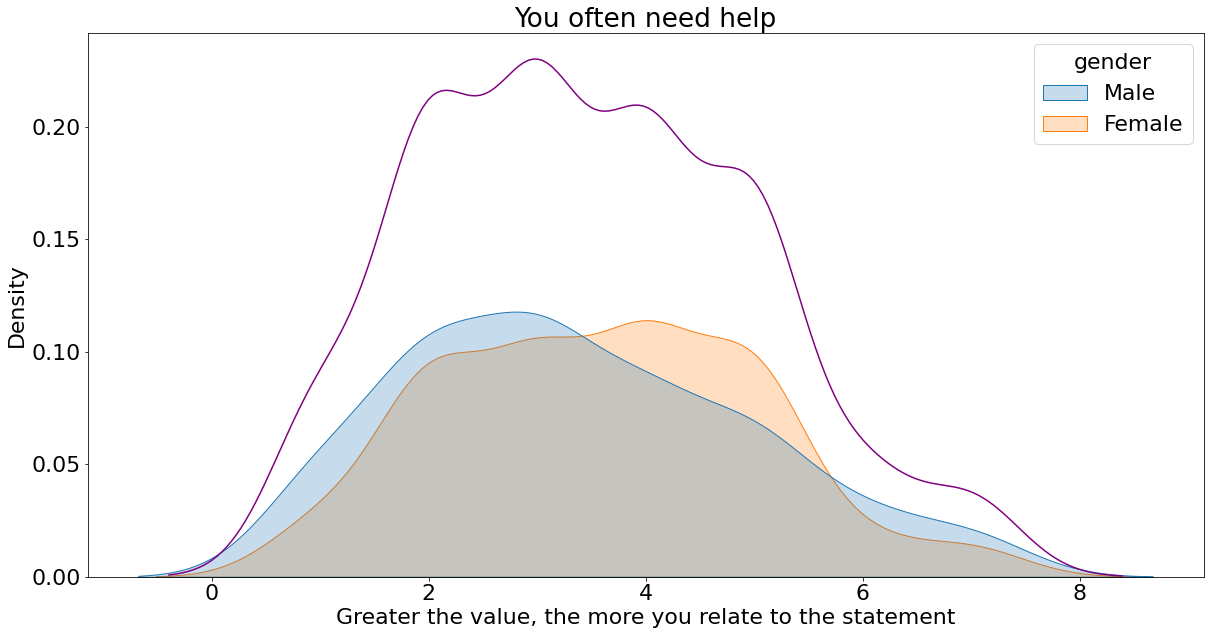

In [43]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_dep_5',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_dep_5' ,label='Overall', color='purple')
plt.title('You often need help')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

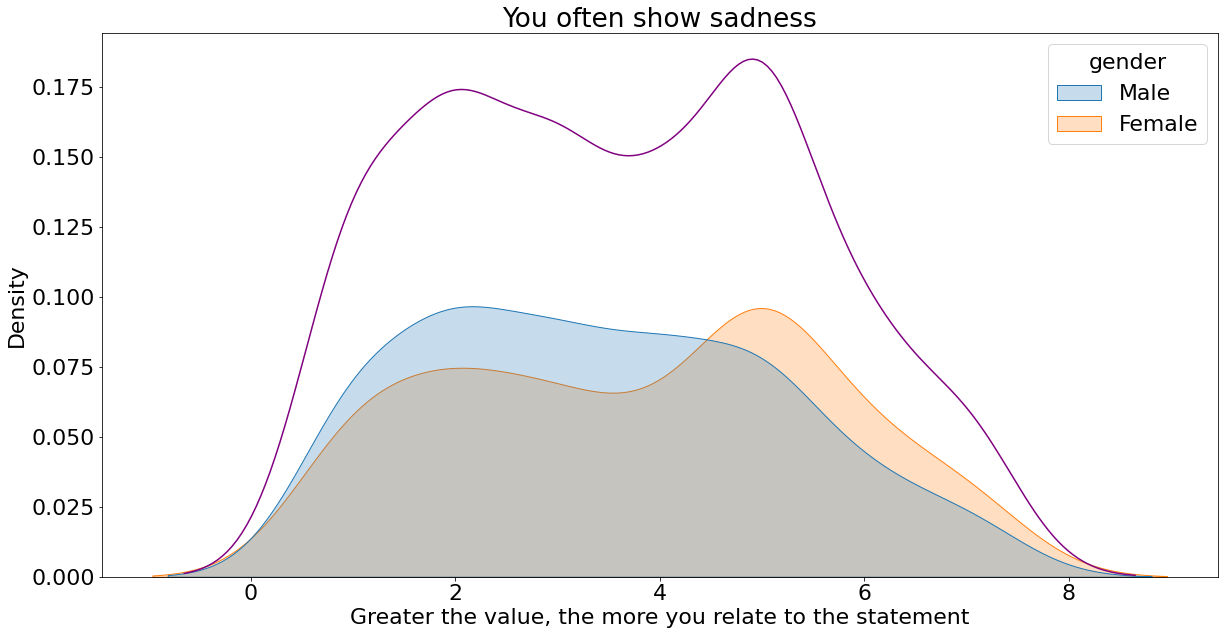

In [44]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_dep_6',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_dep_6' ,label='Overall', color='purple')
plt.title('You often show sadness')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

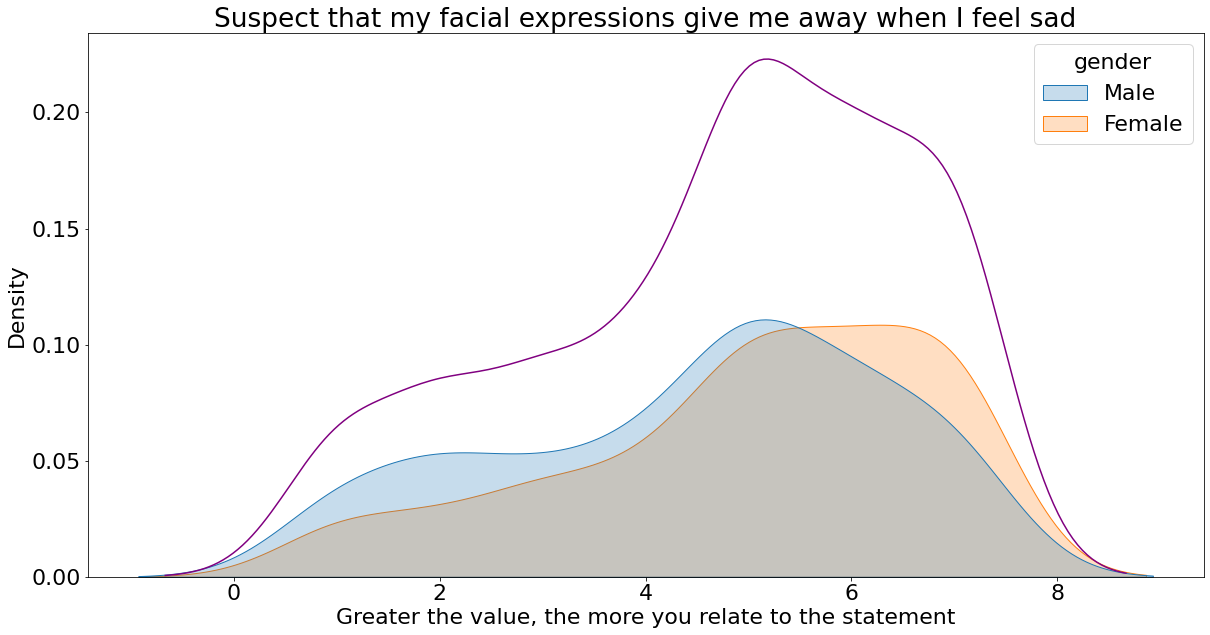

In [45]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_dep_7',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_dep_7' ,label='Overall', color='purple')
plt.title('Suspect that my facial expressions give me away when I feel sad')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

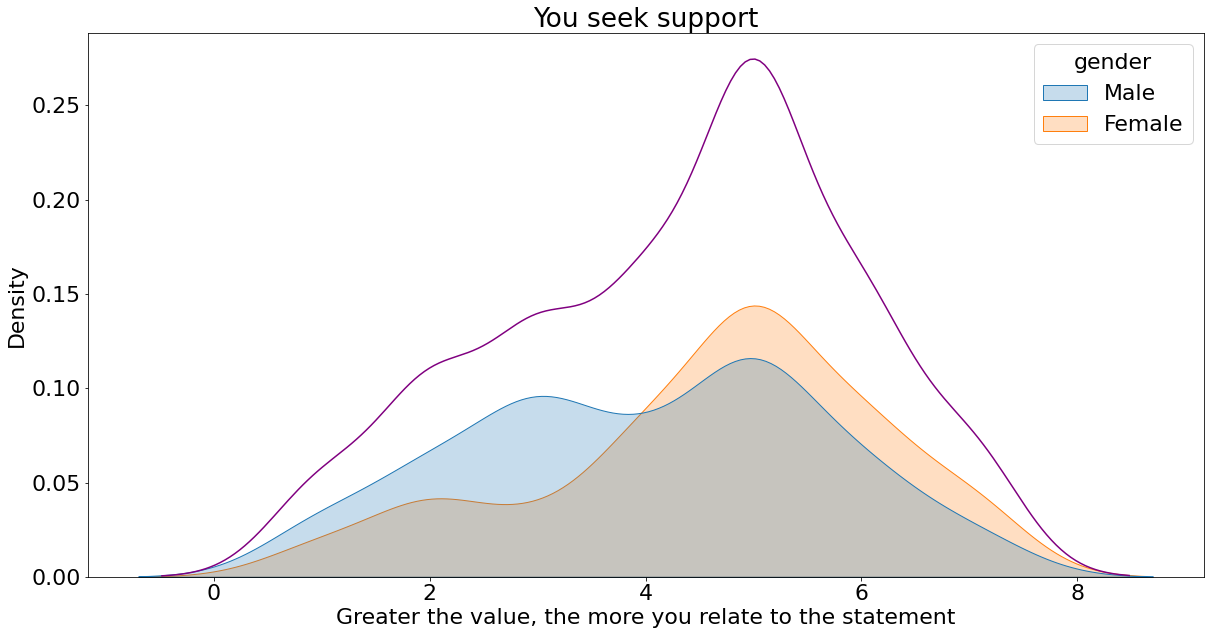

In [46]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_dep_8',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_dep_8' ,label='Overall', color='purple')
plt.title('You seek support')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

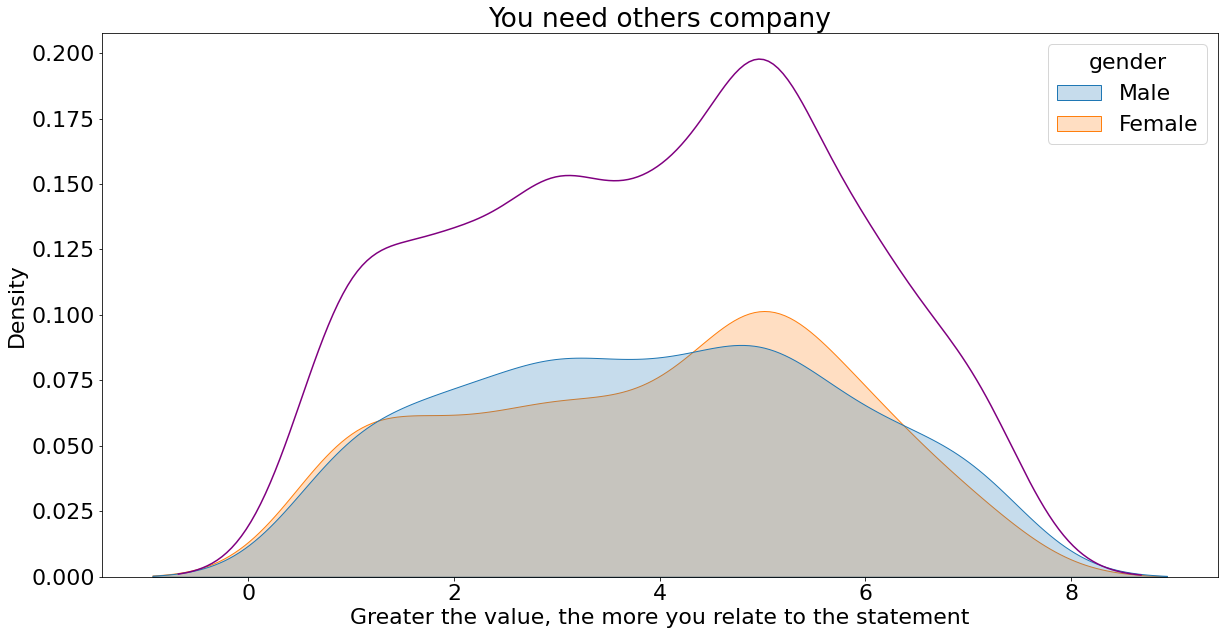

In [47]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_dep_9',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_dep_9' ,label='Overall', color='purple')
plt.title('You need others company')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

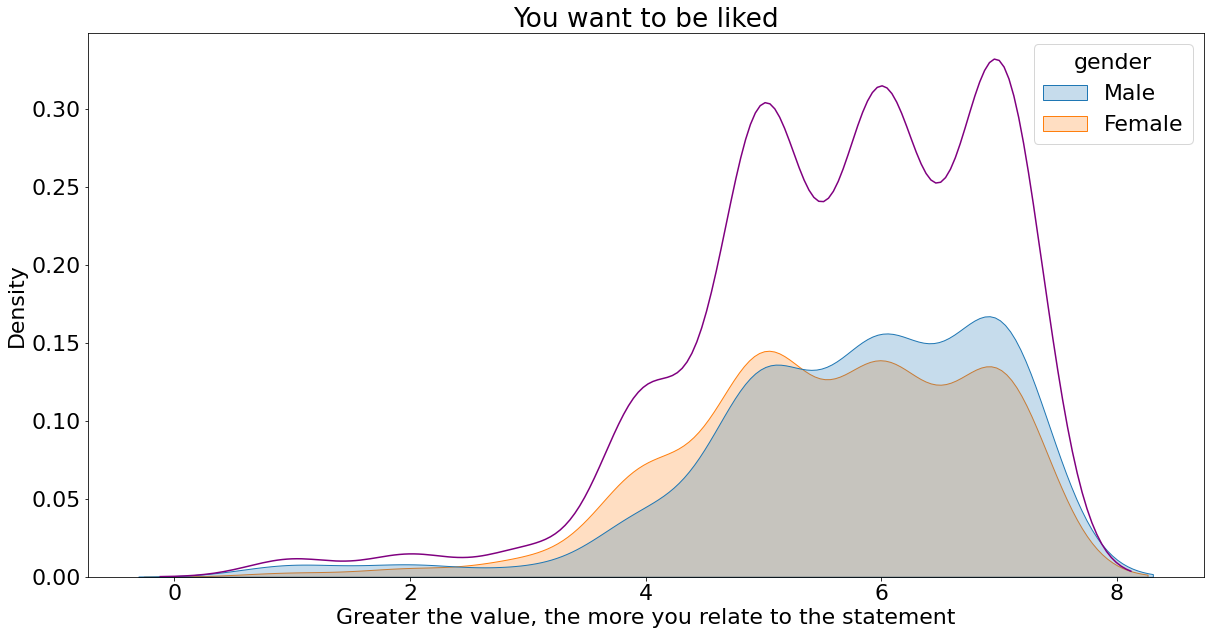

In [48]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_dep_10',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_dep_10' ,label='Overall', color='purple')
plt.title('You want to be liked')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

# 3.3 Fearfulness - EDA

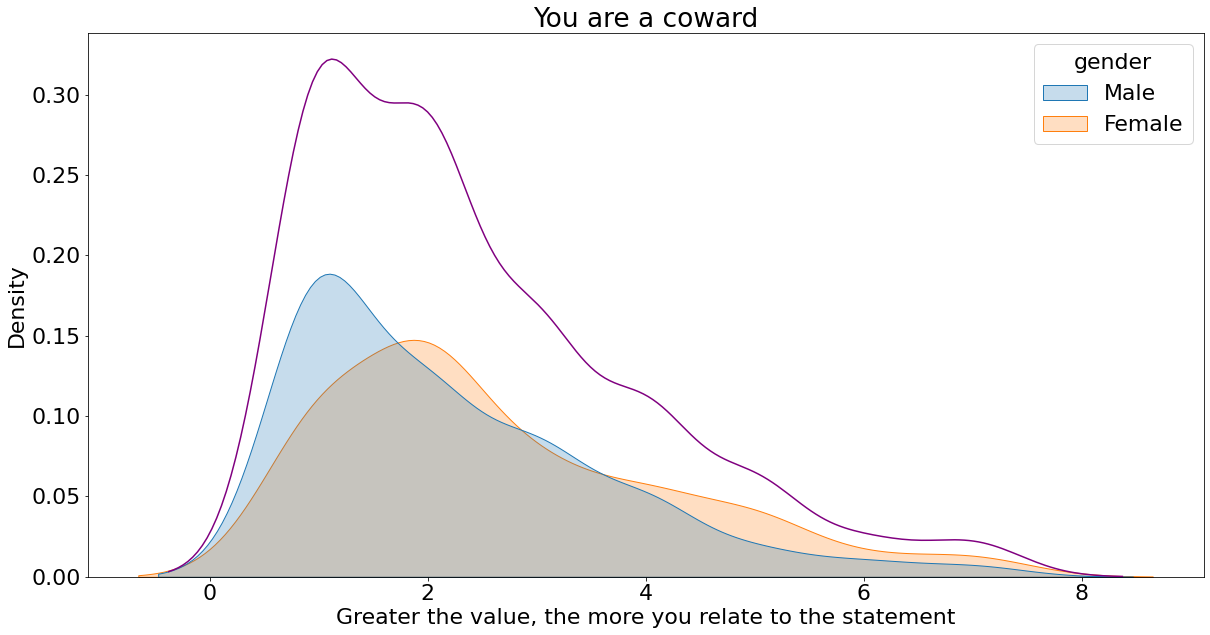

In [49]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_fear_1',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_fear_1' ,label='Overall', color='purple')
plt.title('You are a coward')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

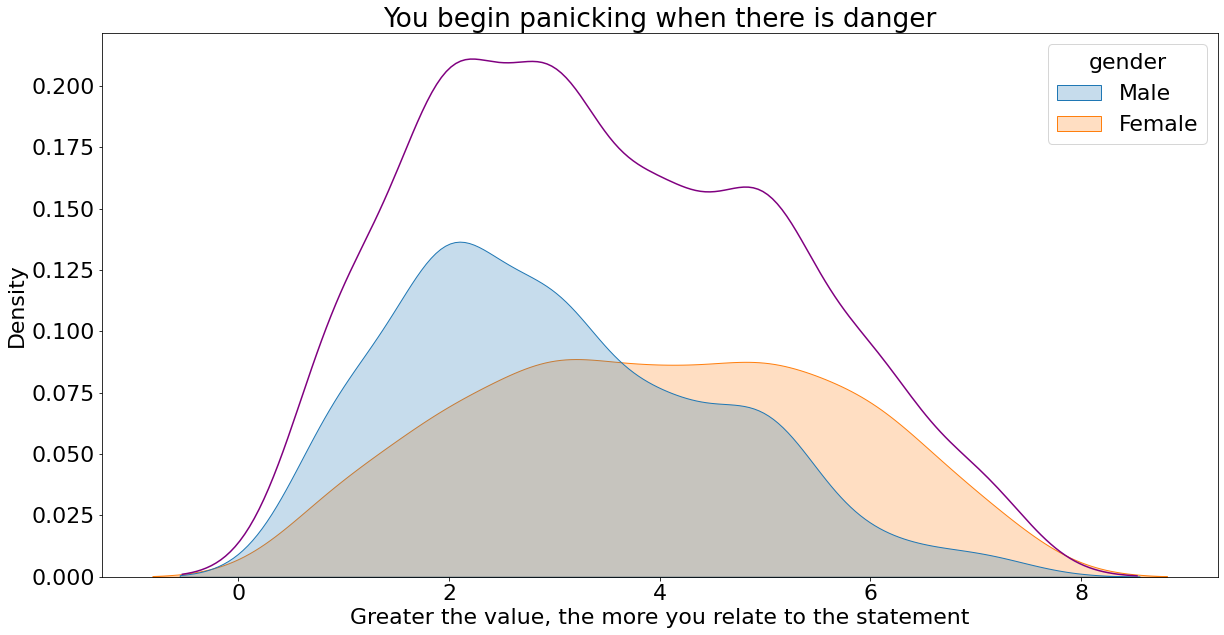

In [50]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_fear_2',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_fear_2' ,label='Overall', color='purple')
plt.title('You begin panicking when there is danger')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

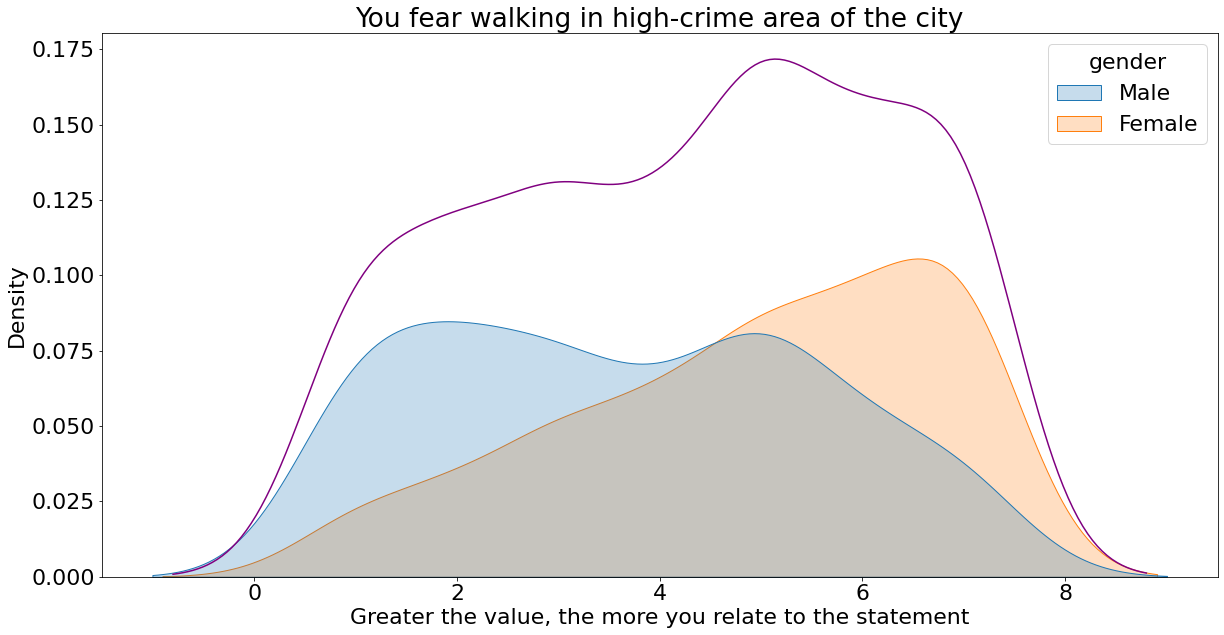

In [51]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_fear_3',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_fear_3' ,label='Overall', color='purple')
plt.title('You fear walking in high-crime area of the city')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

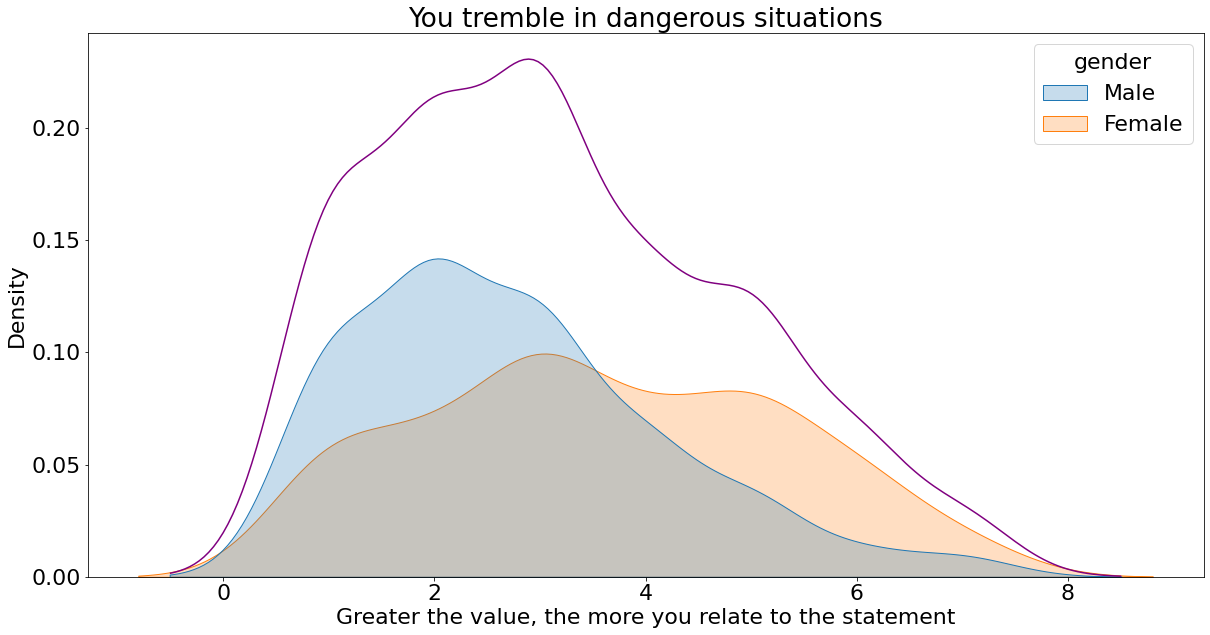

In [52]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_fear_4',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_fear_4' ,label='Overall', color='purple')
plt.title('You tremble in dangerous situations')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

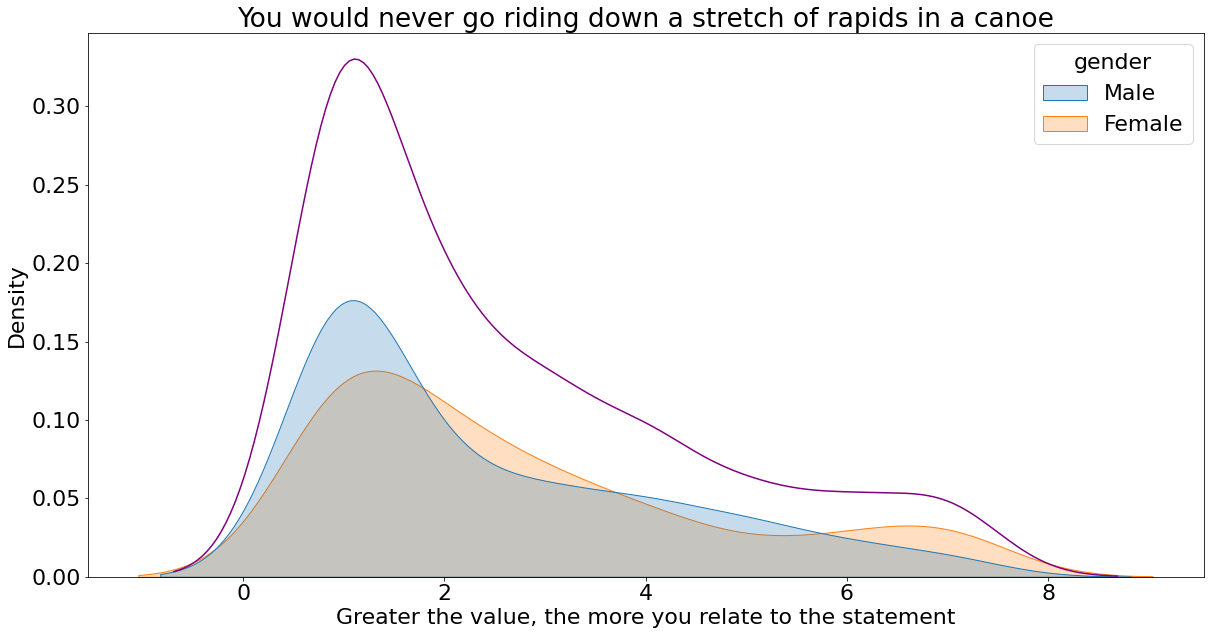

In [53]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_fear_5',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_fear_5' ,label='Overall', color='purple')
plt.title('You would never go riding down a stretch of rapids in a canoe')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

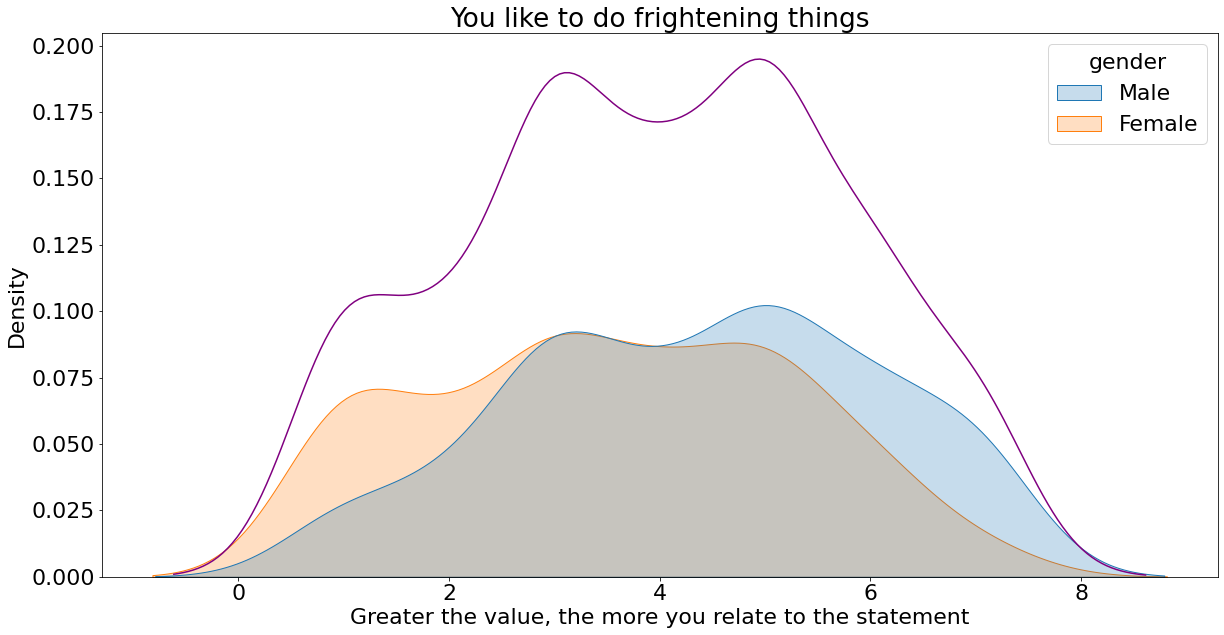

In [54]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_fear_6',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_fear_6' ,label='Overall', color='purple')
plt.title('You like to do frightening things')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

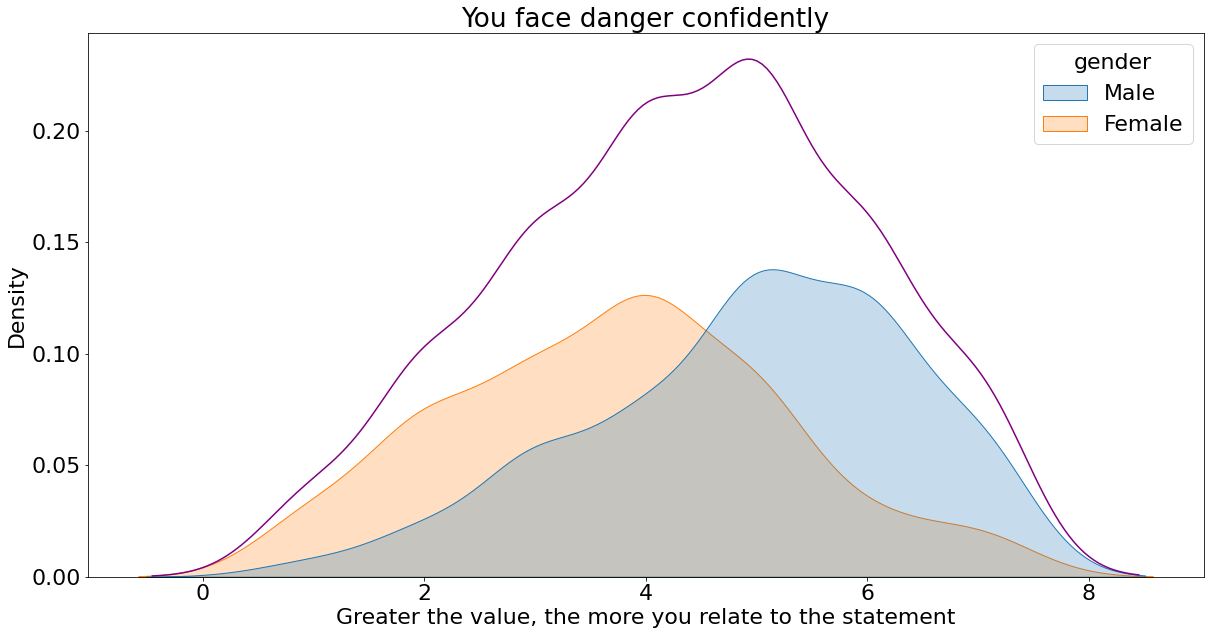

In [55]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_fear_7',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_fear_7' ,label='Overall', color='purple')
plt.title('You face danger confidently')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

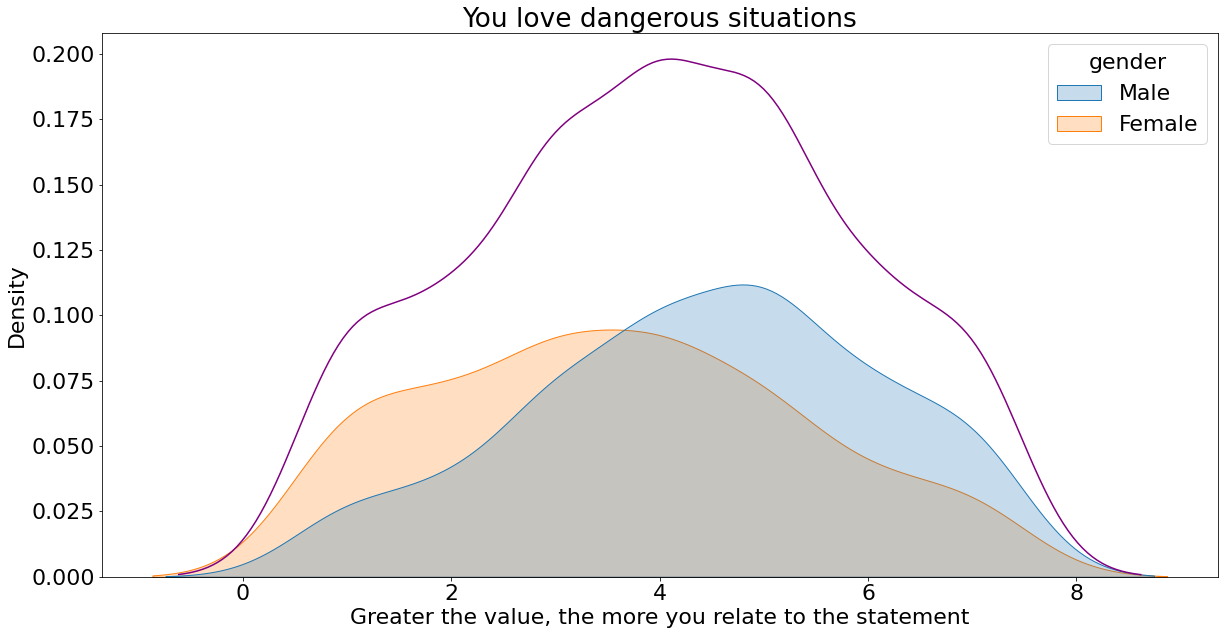

In [56]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_fear_8',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_fear_8' ,label='Overall', color='purple')
plt.title('You love dangerous situations')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

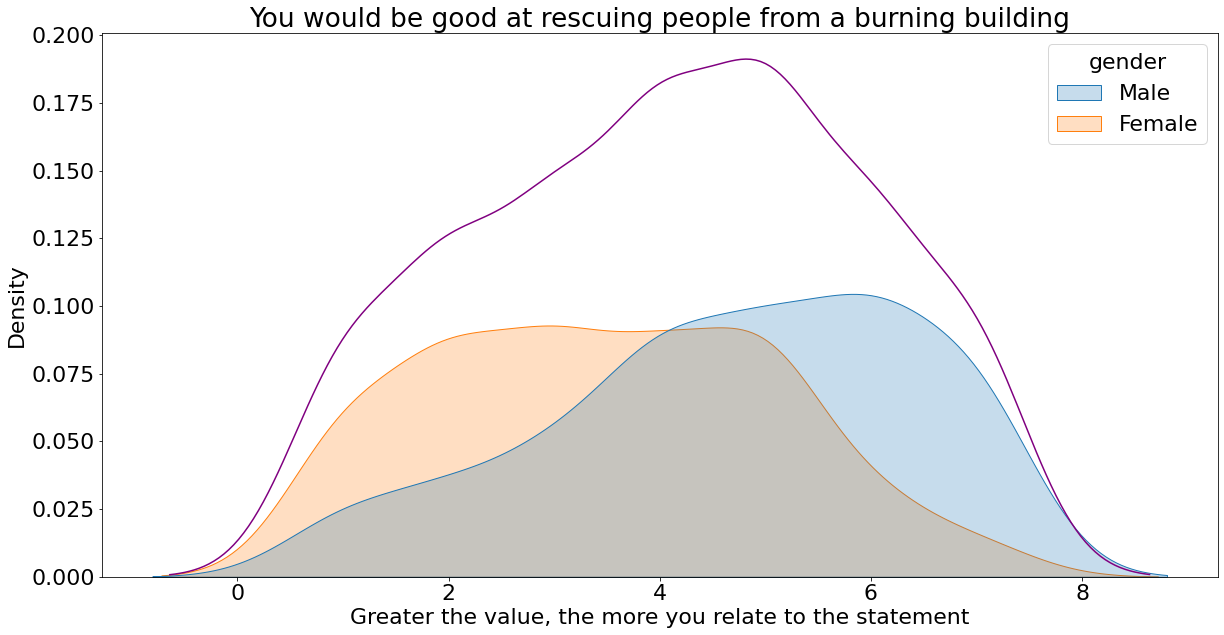

In [57]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_fear_9',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_fear_9' ,label='Overall', color='purple')
plt.title('You would be good at rescuing people from a burning building')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

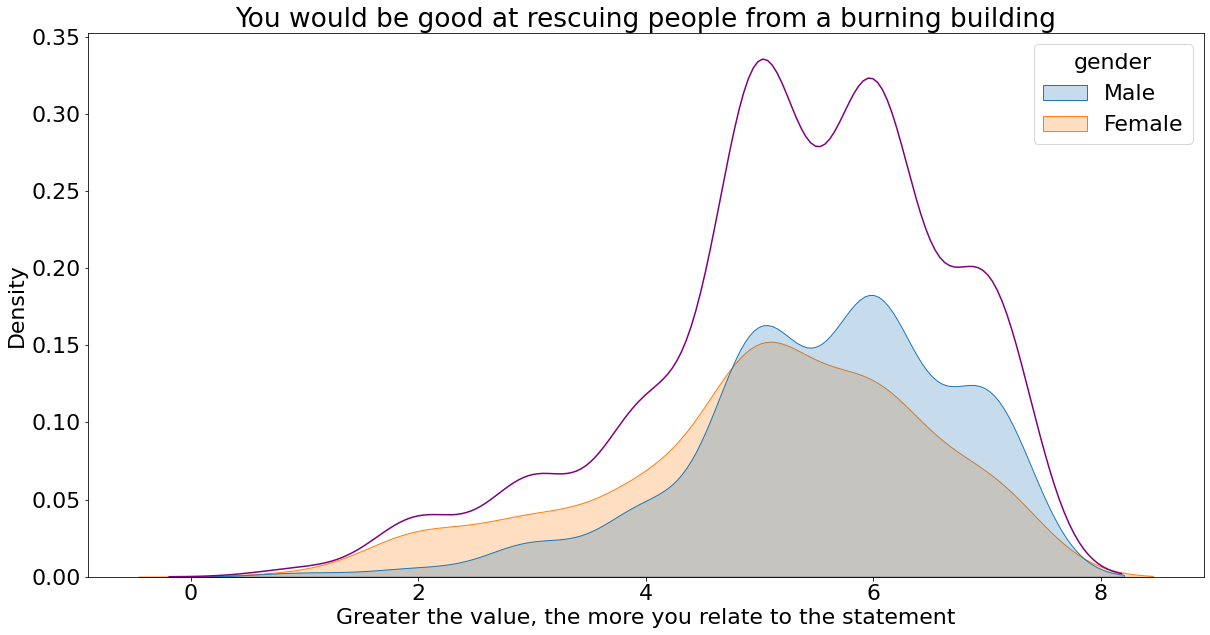

In [58]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_fear_10',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_fear_10' ,label='Overall', color='purple')
plt.title('You would be good at rescuing people from a burning building')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

# 3.4 Sentimentality - EDA

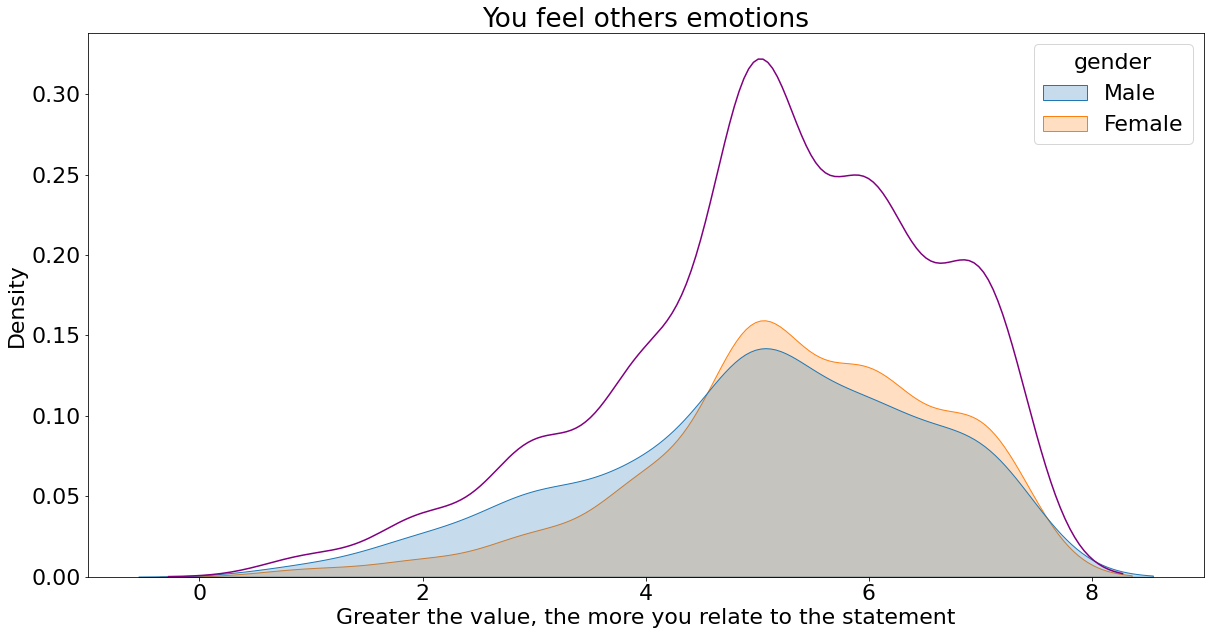

In [59]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_sen_1',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_sen_1' ,label='Overall', color='purple')
plt.title('You feel others emotions')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

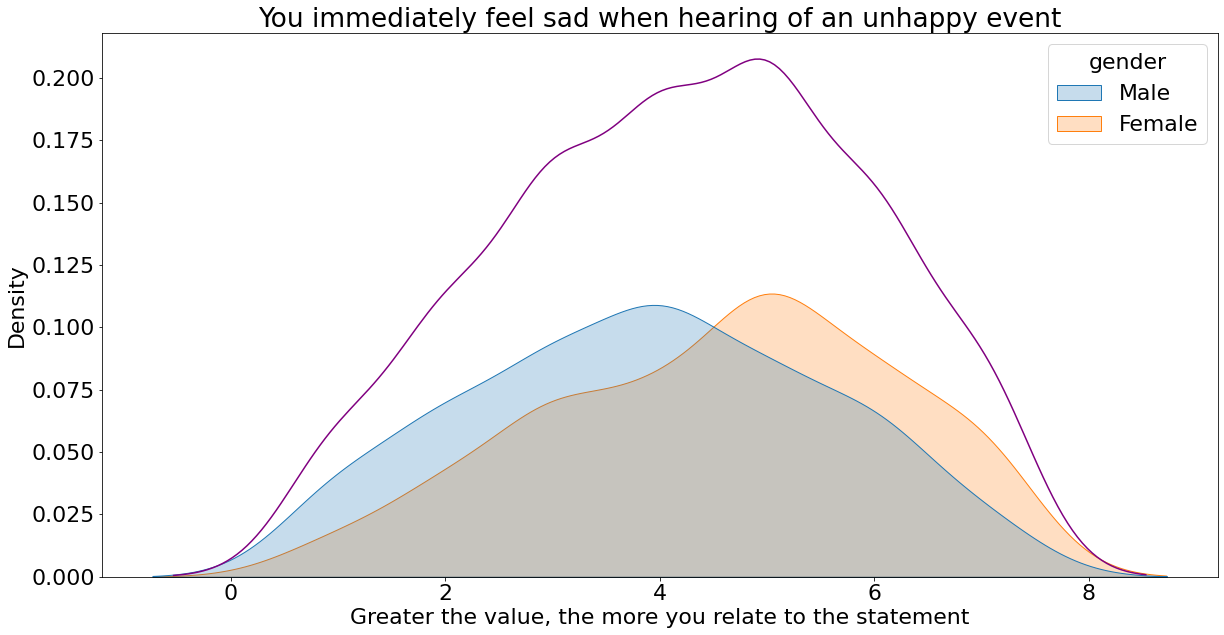

In [60]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_sen_2',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_sen_2' ,label='Overall', color='purple')
plt.title('You immediately feel sad when hearing of an unhappy event')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

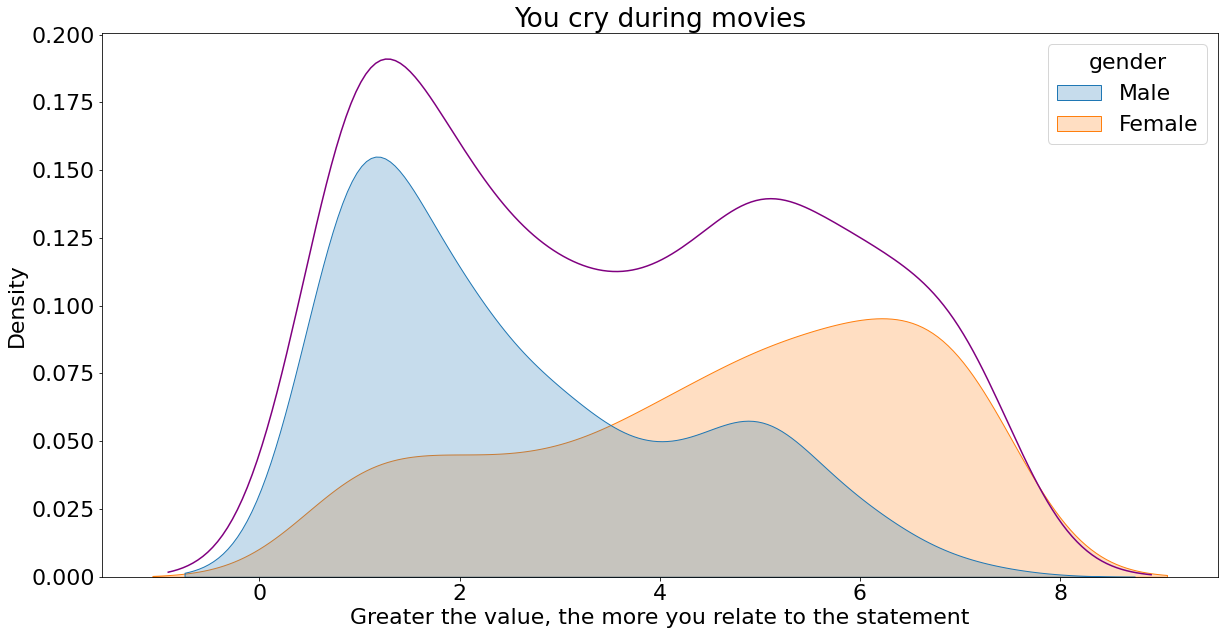

In [61]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_sen_3',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_sen_3' ,label='Overall', color='purple')
plt.title('You cry during movies')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

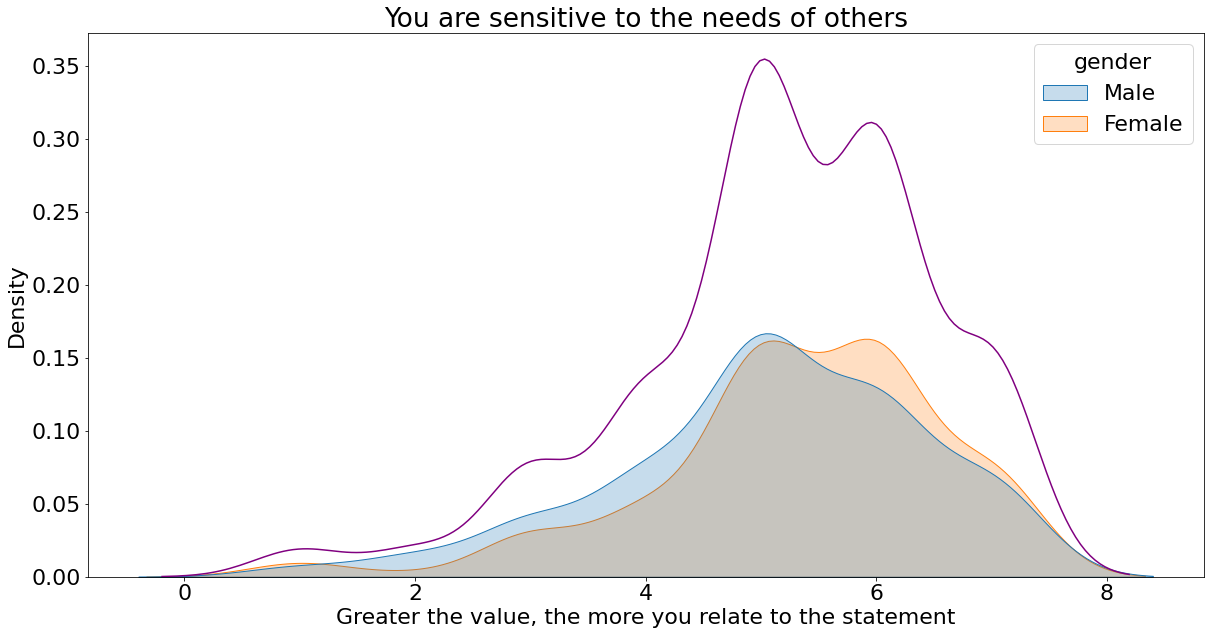

In [62]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_sen_4',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_sen_4' ,label='Overall', color='purple')
plt.title('You are sensitive to the needs of others')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

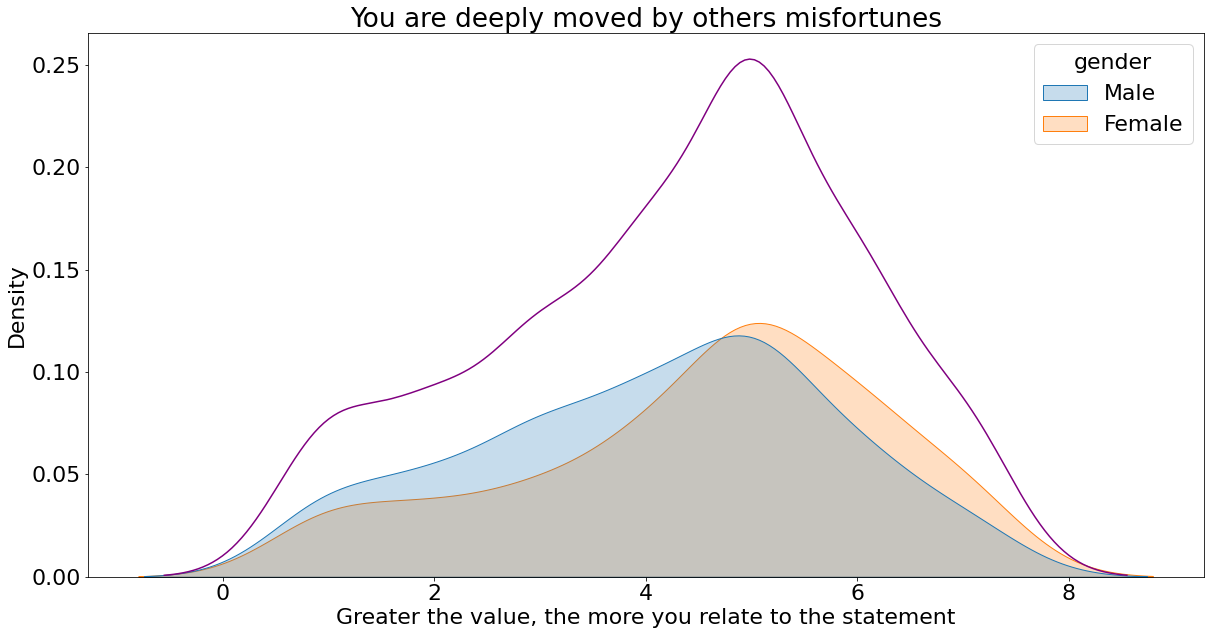

In [63]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_sen_5',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_sen_5' ,label='Overall', color='purple')
plt.title('You are deeply moved by others misfortunes')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

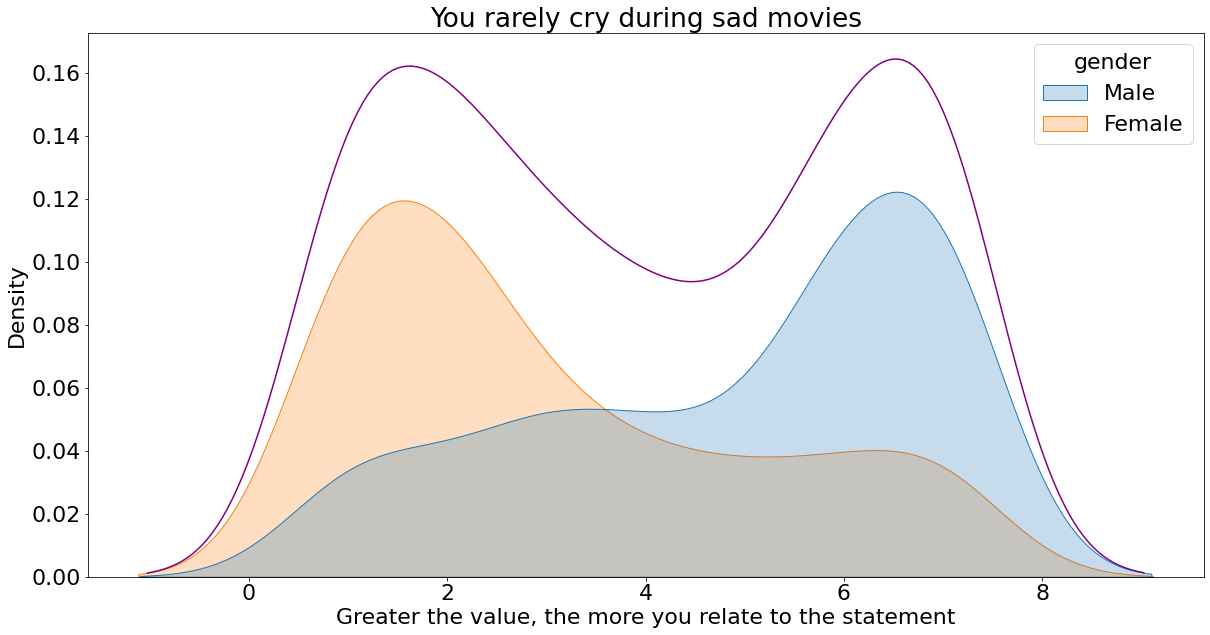

In [64]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_sen_6',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_sen_6' ,label='Overall', color='purple')
plt.title('You rarely cry during sad movies')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

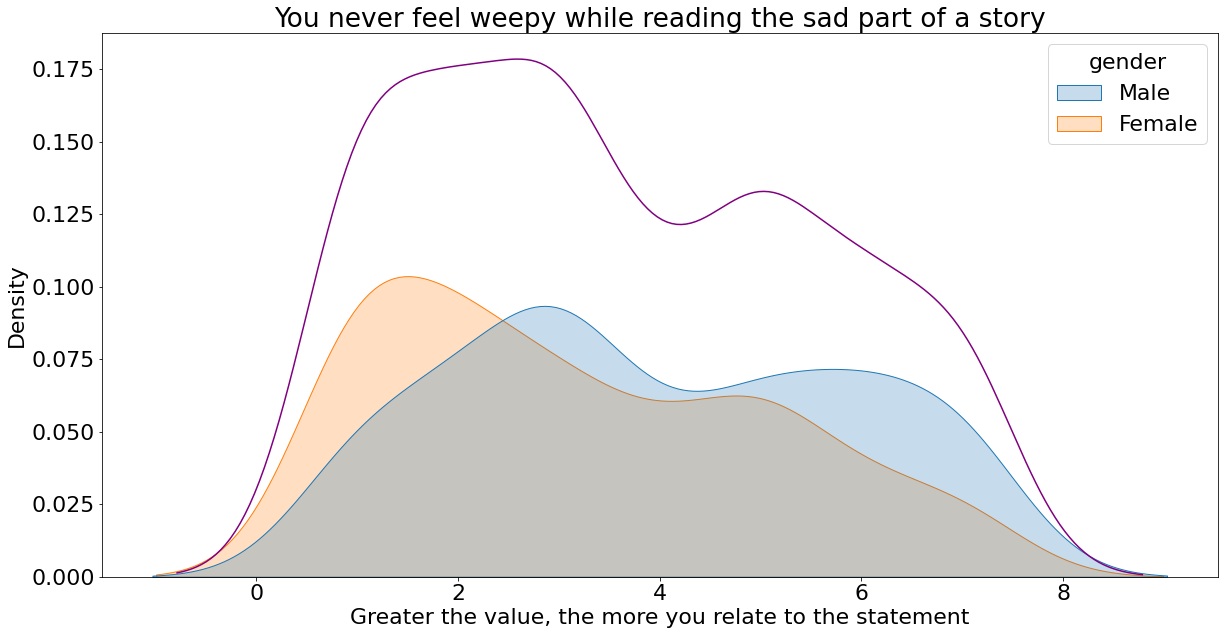

In [65]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_sen_7',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_sen_7' ,label='Overall', color='purple')
plt.title('You never feel weepy while reading the sad part of a story')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

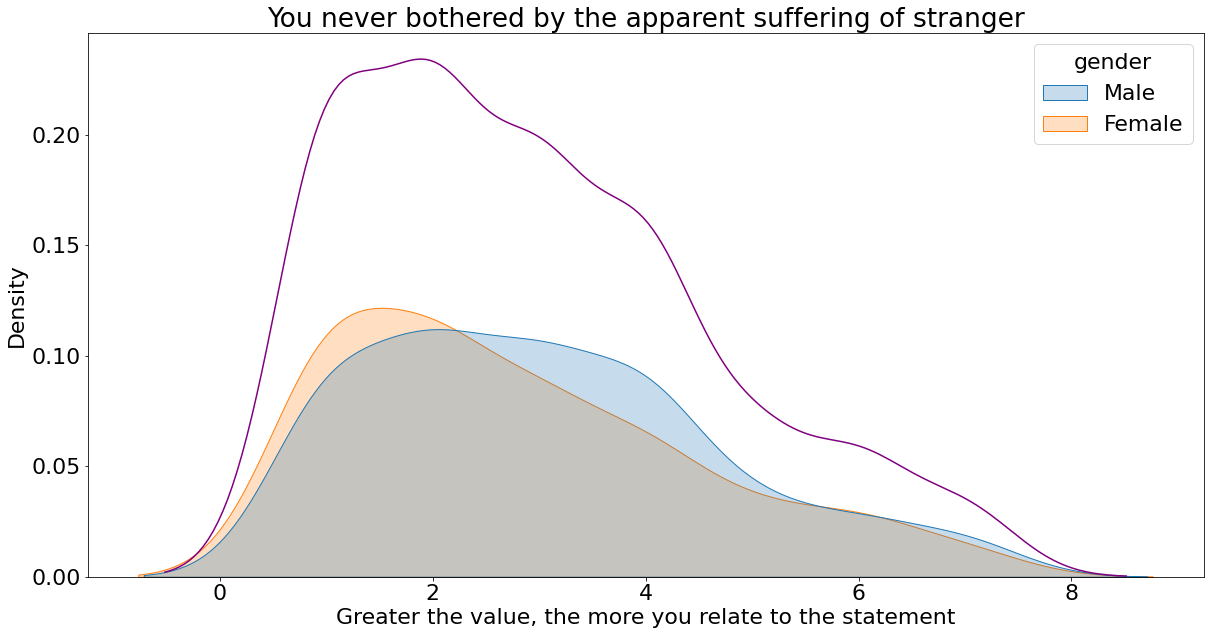

In [66]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_sen_8',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_sen_8' ,label='Overall', color='purple')
plt.title('You never bothered by the apparent suffering of stranger')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

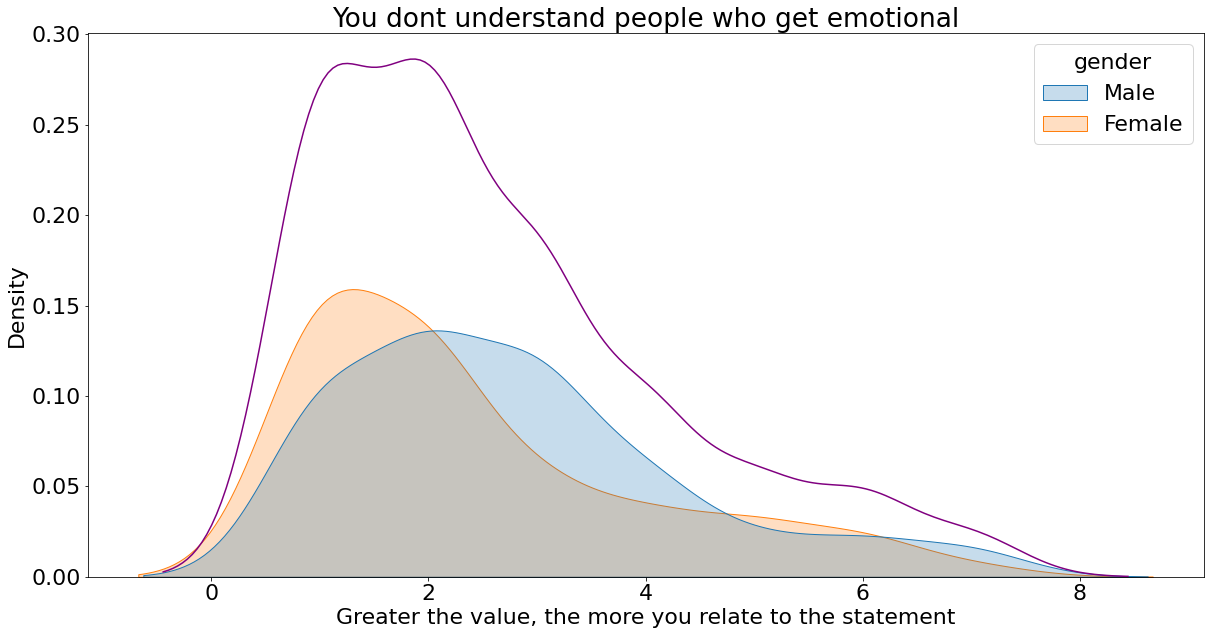

In [67]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_sen_9',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_sen_9' ,label='Overall', color='purple')
plt.title('You dont understand people who get emotional')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

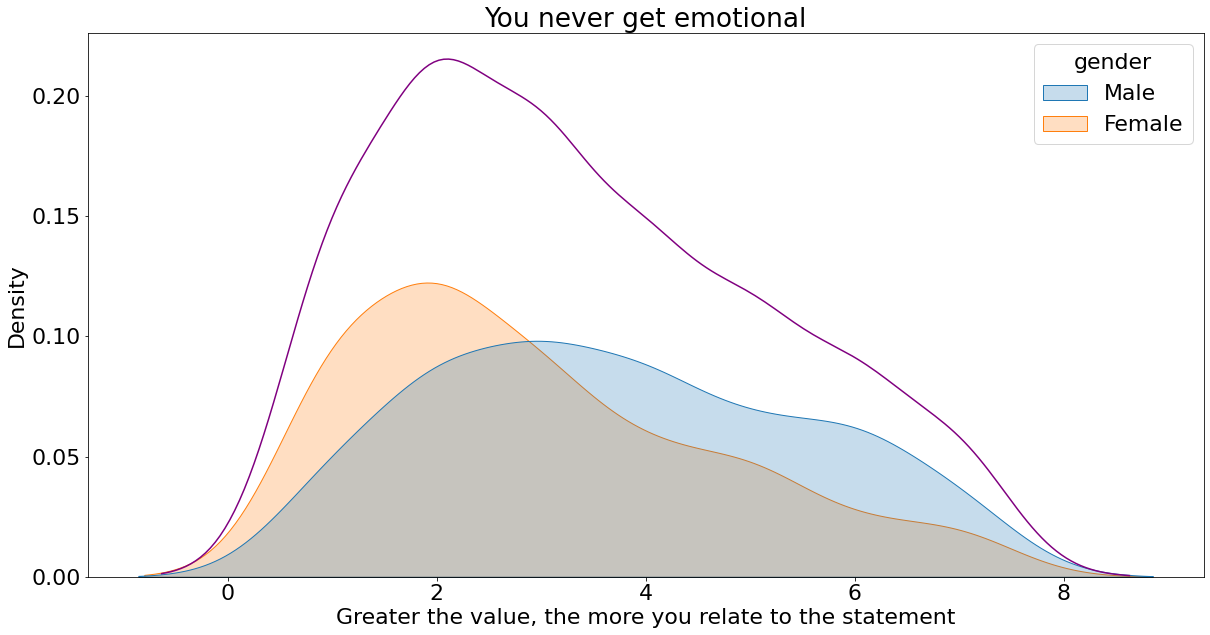

In [68]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_1, x='e_sen_10',hue='gender', fill=True)
sns.kdeplot(data=df_1, x='e_sen_10' ,label='Overall', color='purple')
plt.title('You never get emotional')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

# 3.4 Hexaco - EDA

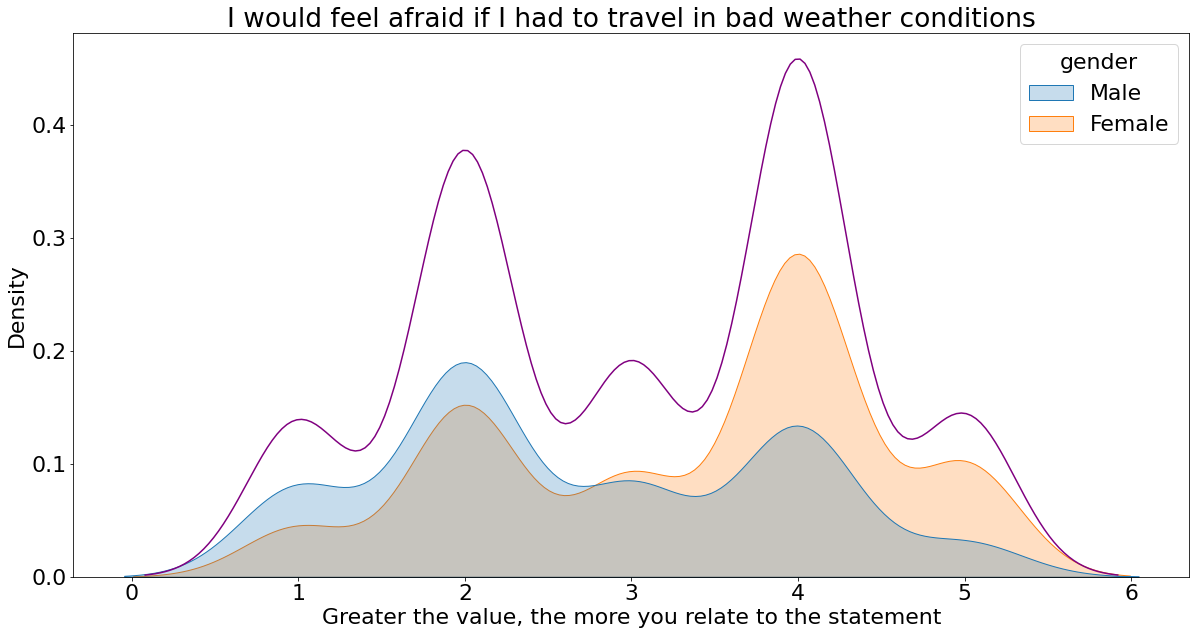

In [69]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_5',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_5' ,label='Overall', color='purple')
plt.title('I would feel afraid if I had to travel in bad weather conditions')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

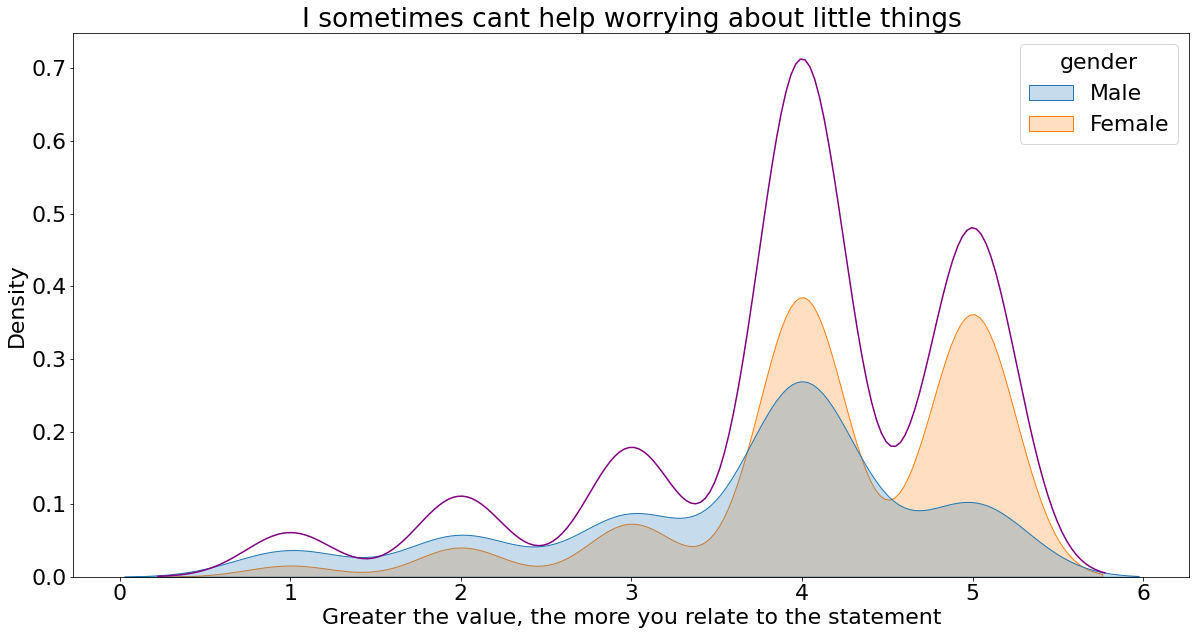

In [70]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_11',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_11' ,label='Overall', color='purple')
plt.title('I sometimes cant help worrying about little things')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

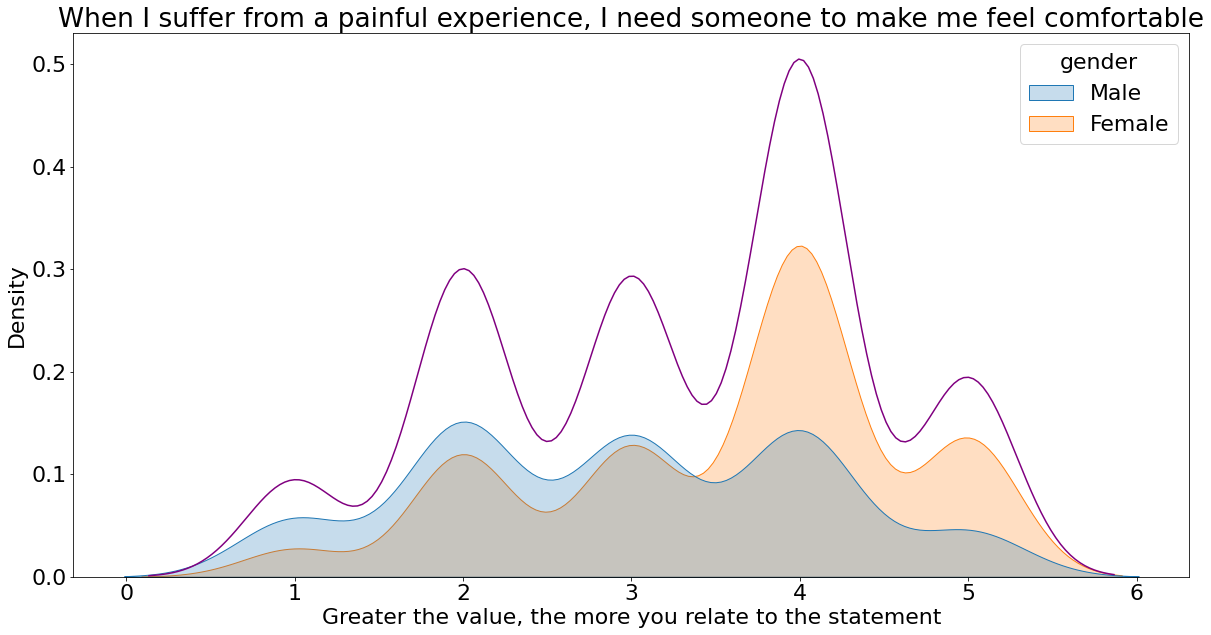

In [71]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_17',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_17' ,label='Overall', color='purple')
plt.title('When I suffer from a painful experience, I need someone to make me feel comfortable')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

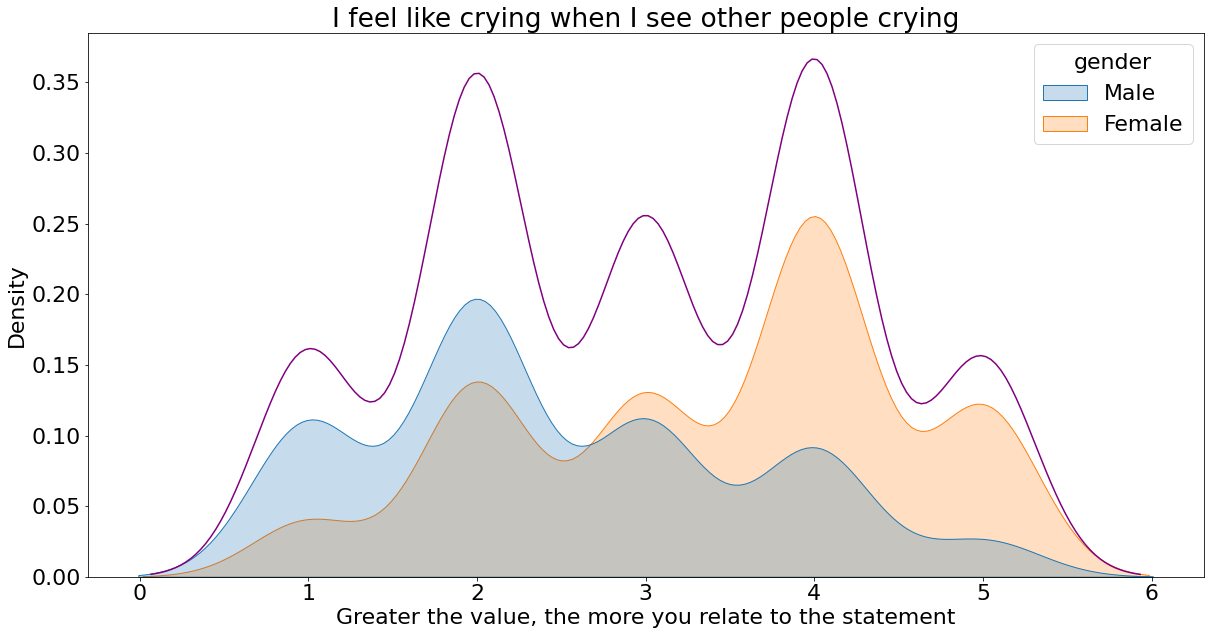

In [72]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_23',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_23' ,label='Overall', color='purple')
plt.title('I feel like crying when I see other people crying')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

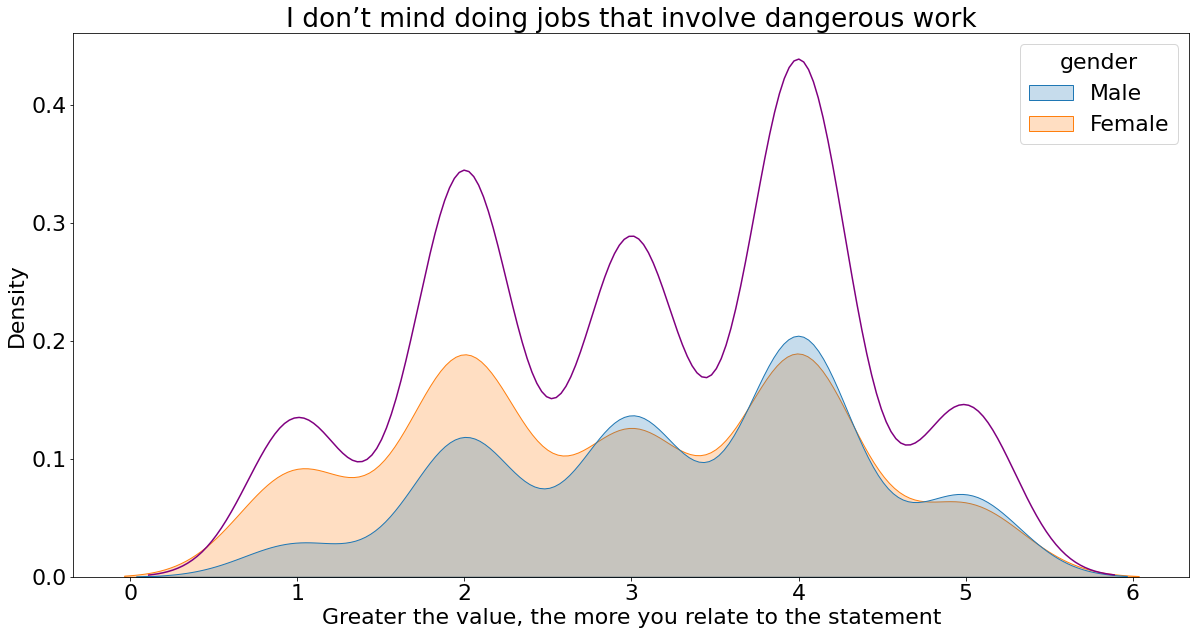

In [73]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_29',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_29' ,label='Overall', color='purple')
plt.title('I don’t mind doing jobs that involve dangerous work')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

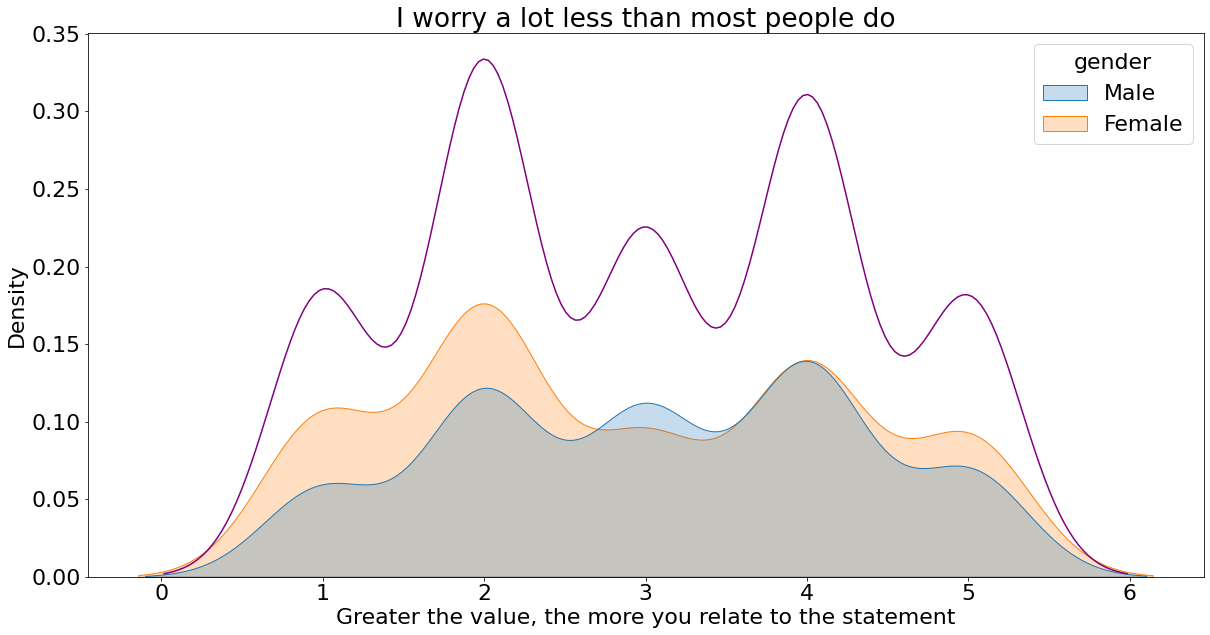

In [74]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_35',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_35' ,label='Overall', color='purple')
plt.title('I worry a lot less than most people do')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

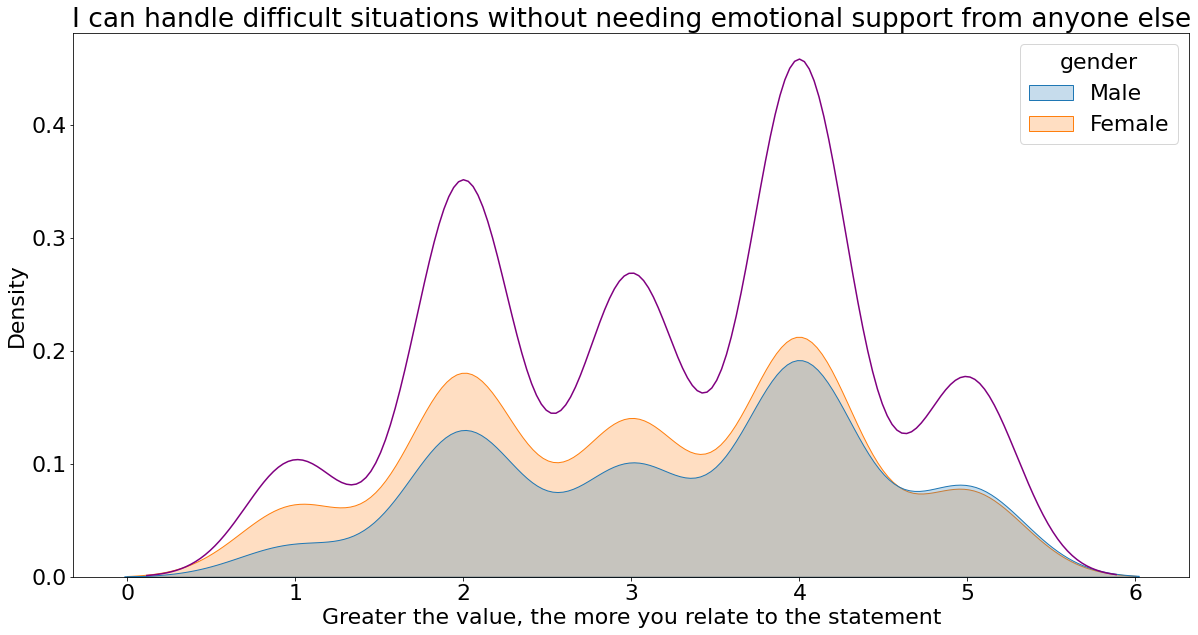

In [75]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_41',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_41' ,label='Overall', color='purple')
plt.title('I can handle difficult situations without needing emotional support from anyone else')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

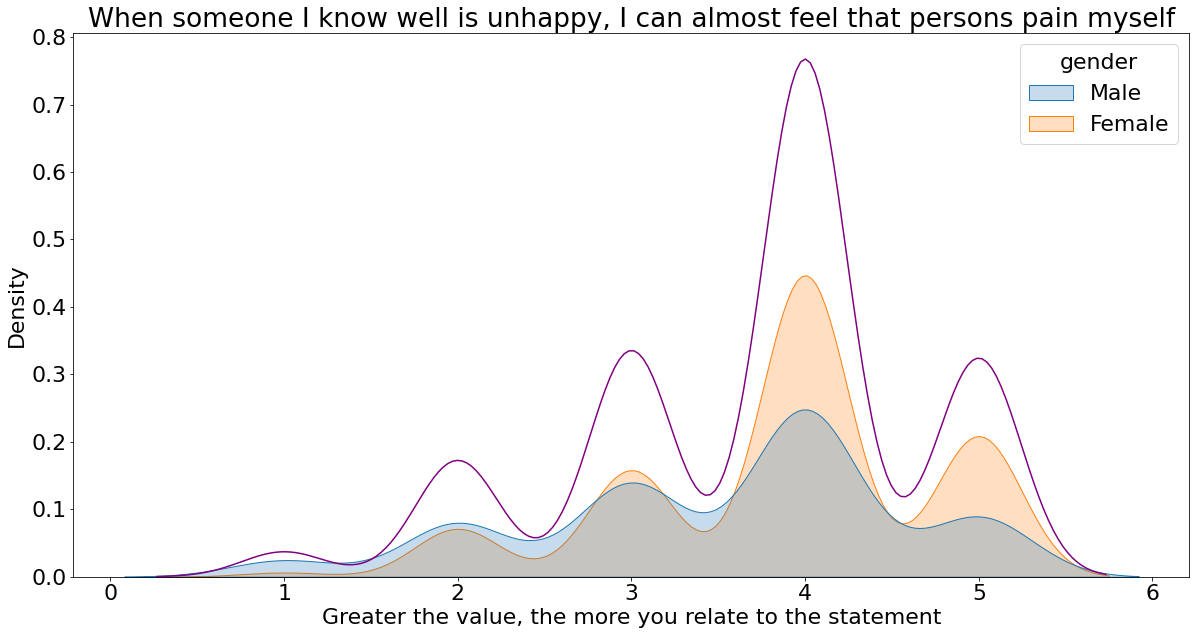

In [76]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_47',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_47' ,label='Overall', color='purple')
plt.title('When someone I know well is unhappy, I can almost feel that persons pain myself')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

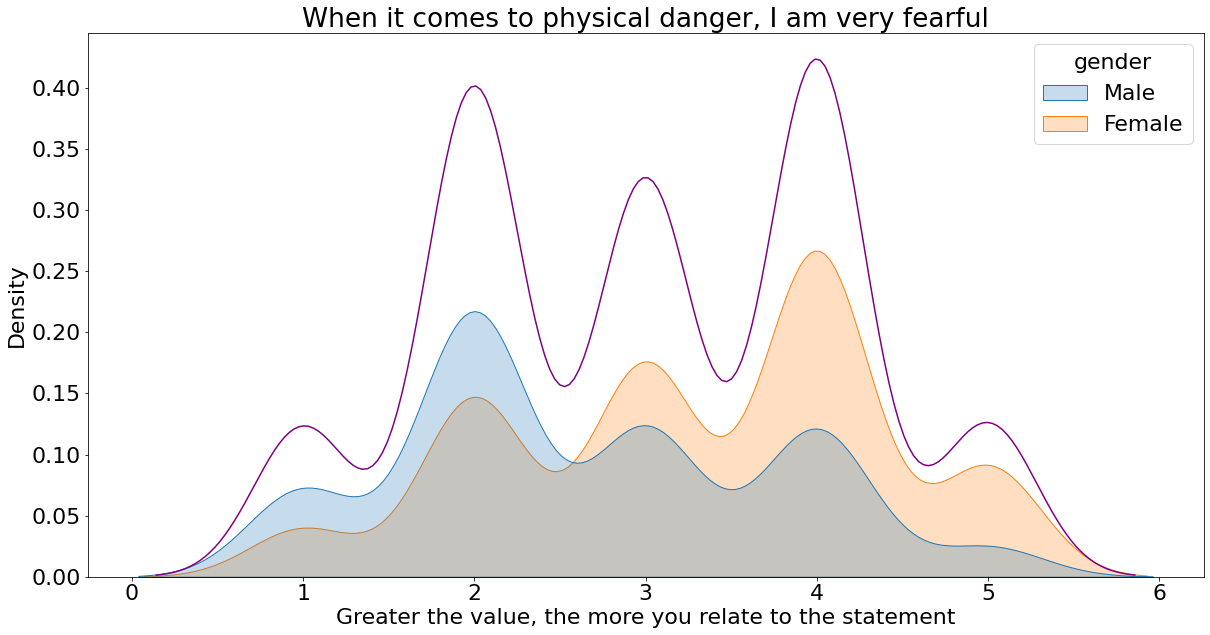

In [77]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_53',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_53' ,label='Overall', color='purple')
plt.title('When it comes to physical danger, I am very fearful')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

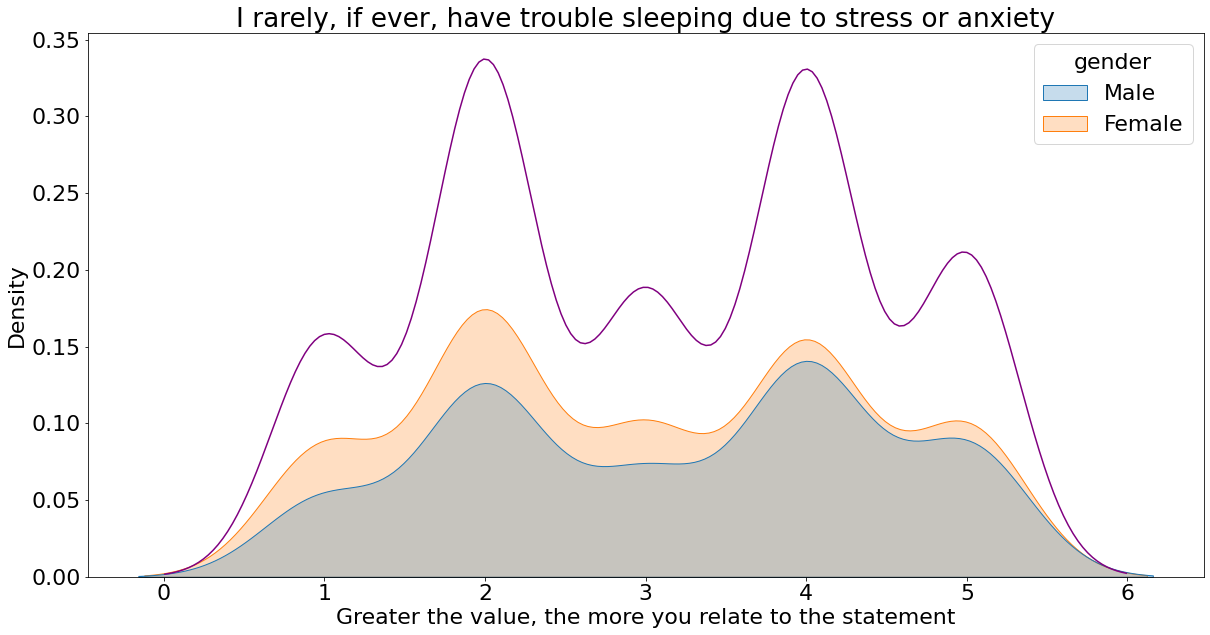

In [78]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_59',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_59' ,label='Overall', color='purple')
plt.title('I rarely, if ever, have trouble sleeping due to stress or anxiety')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

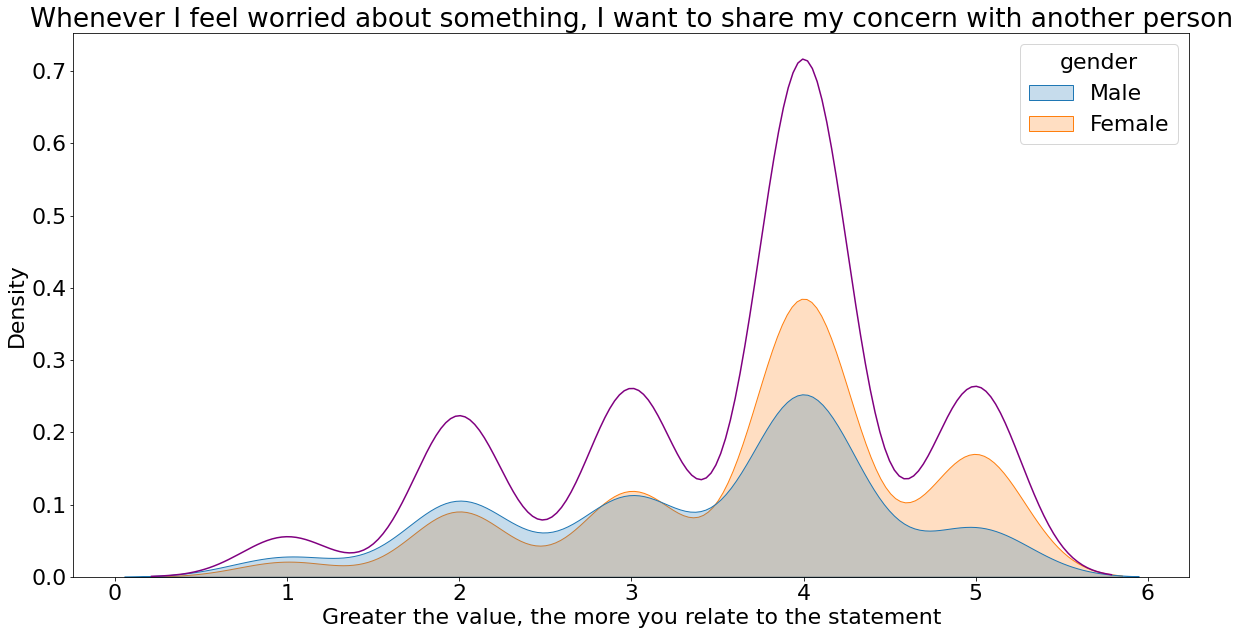

In [79]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_65',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_65' ,label='Overall', color='purple')
plt.title('Whenever I feel worried about something, I want to share my concern with another person')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

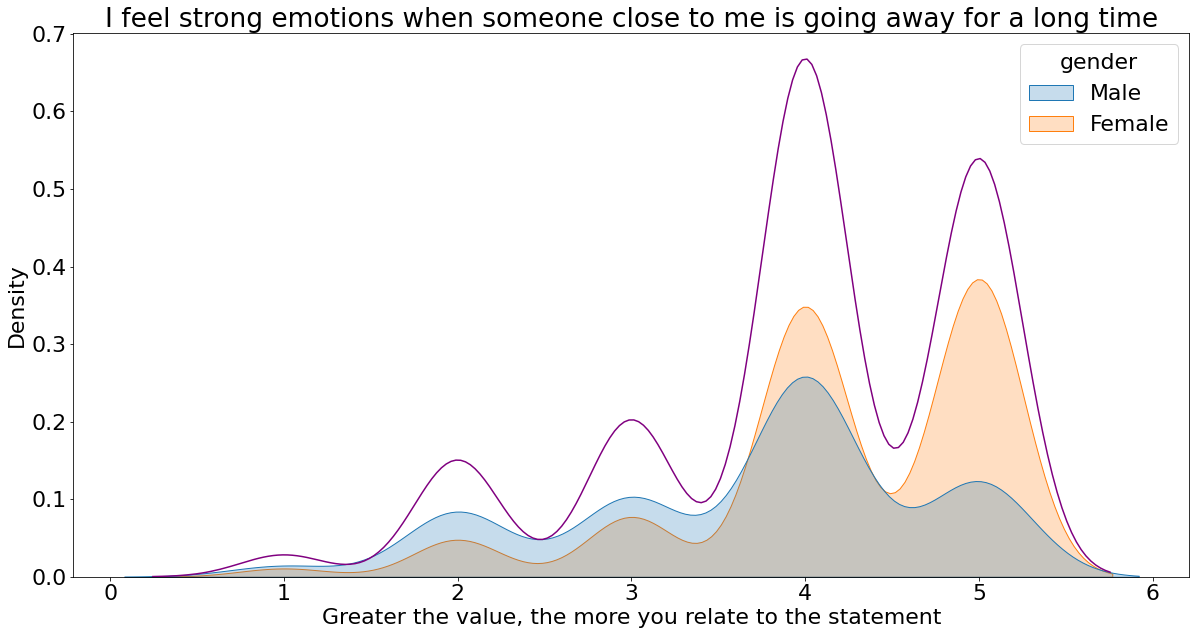

In [80]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_71',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_71' ,label='Overall', color='purple')
plt.title('I feel strong emotions when someone close to me is going away for a long time')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

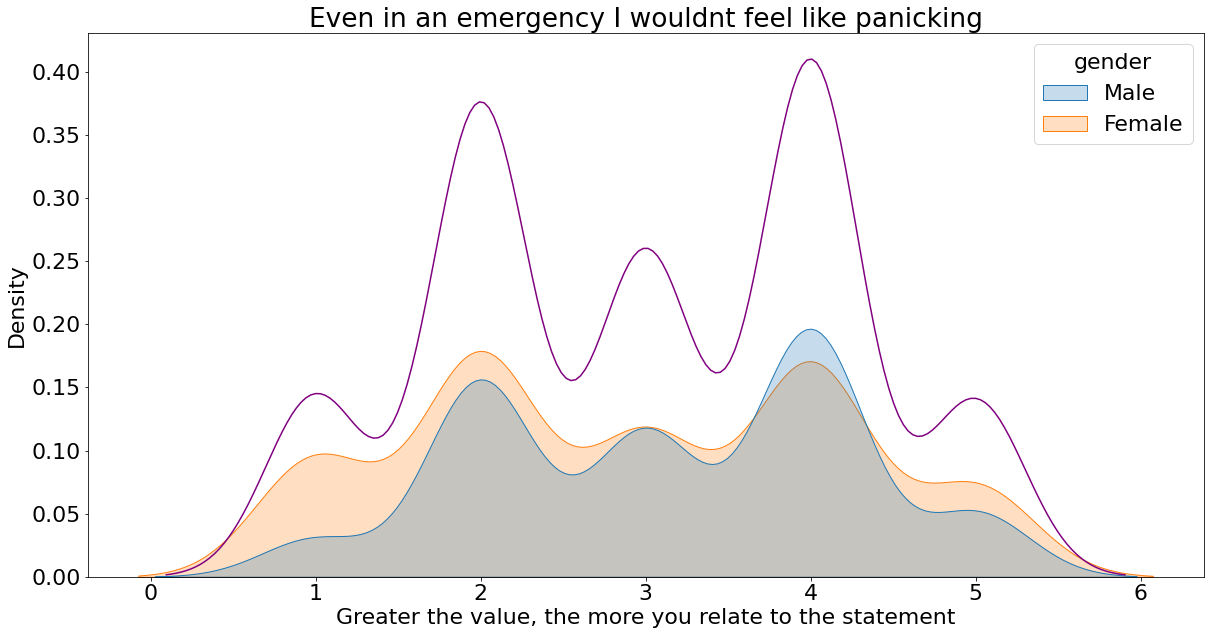

In [81]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_77',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_77' ,label='Overall', color='purple')
plt.title('Even in an emergency I wouldnt feel like panicking')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

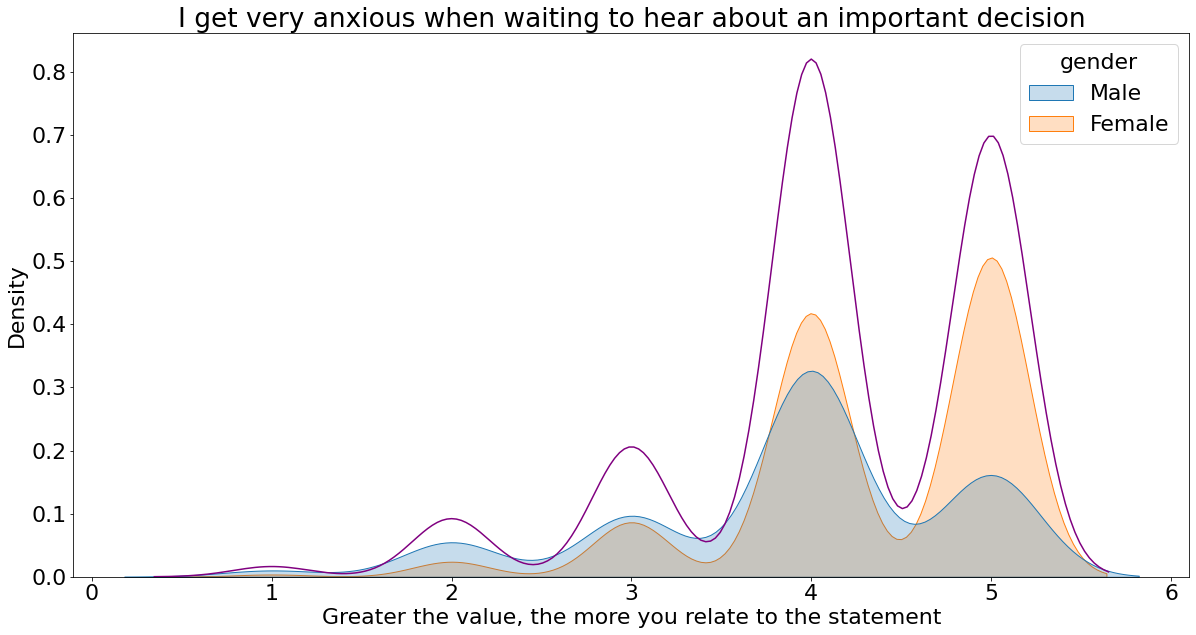

In [82]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_83',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_83' ,label='Overall', color='purple')
plt.title('I get very anxious when waiting to hear about an important decision')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

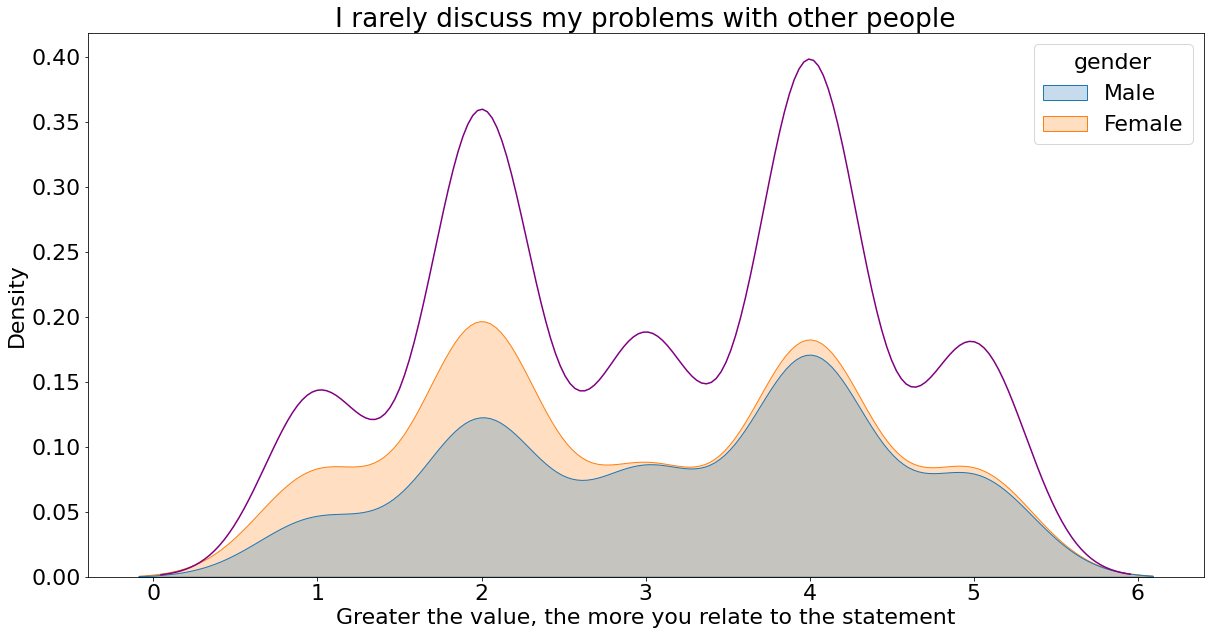

In [83]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_89',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_89' ,label='Overall', color='purple')
plt.title('I rarely discuss my problems with other people')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

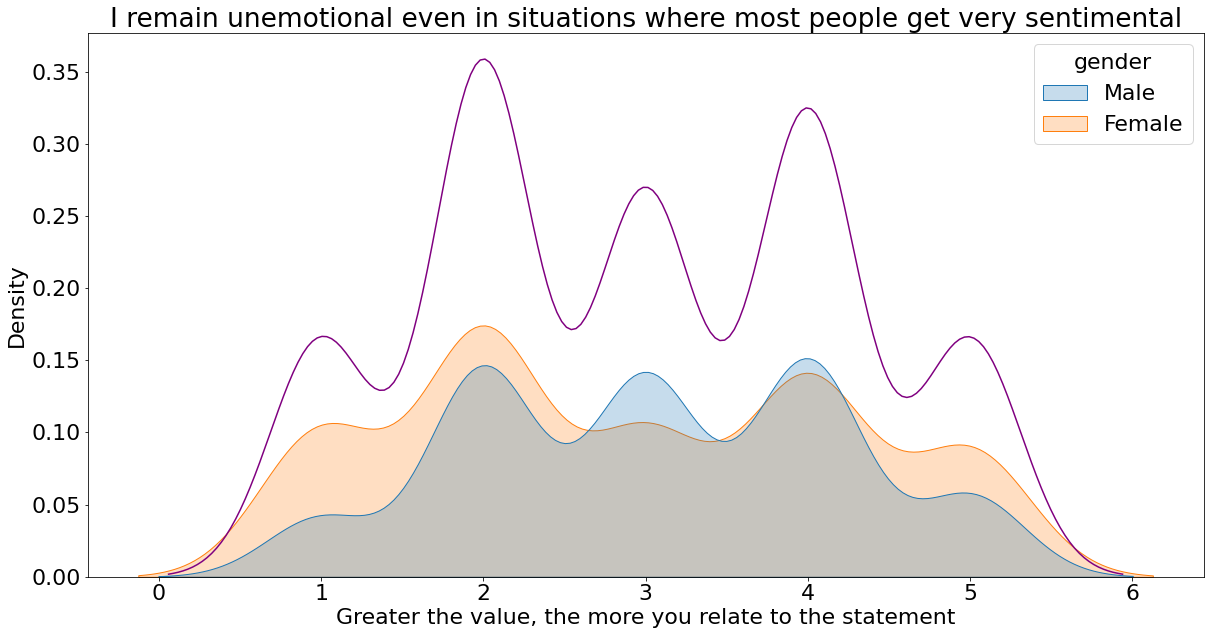

In [84]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df_2, x='hex_95',hue='gender', fill=True)
sns.kdeplot(data=df_2, x='hex_95' ,label='Overall', color='purple')
plt.title('I remain unemotional even in situations where most people get very sentimental')
plt.xlabel('Greater the value, the more you relate to the statement')
plt.show()

# 3.5 Preprocess_1 EDA

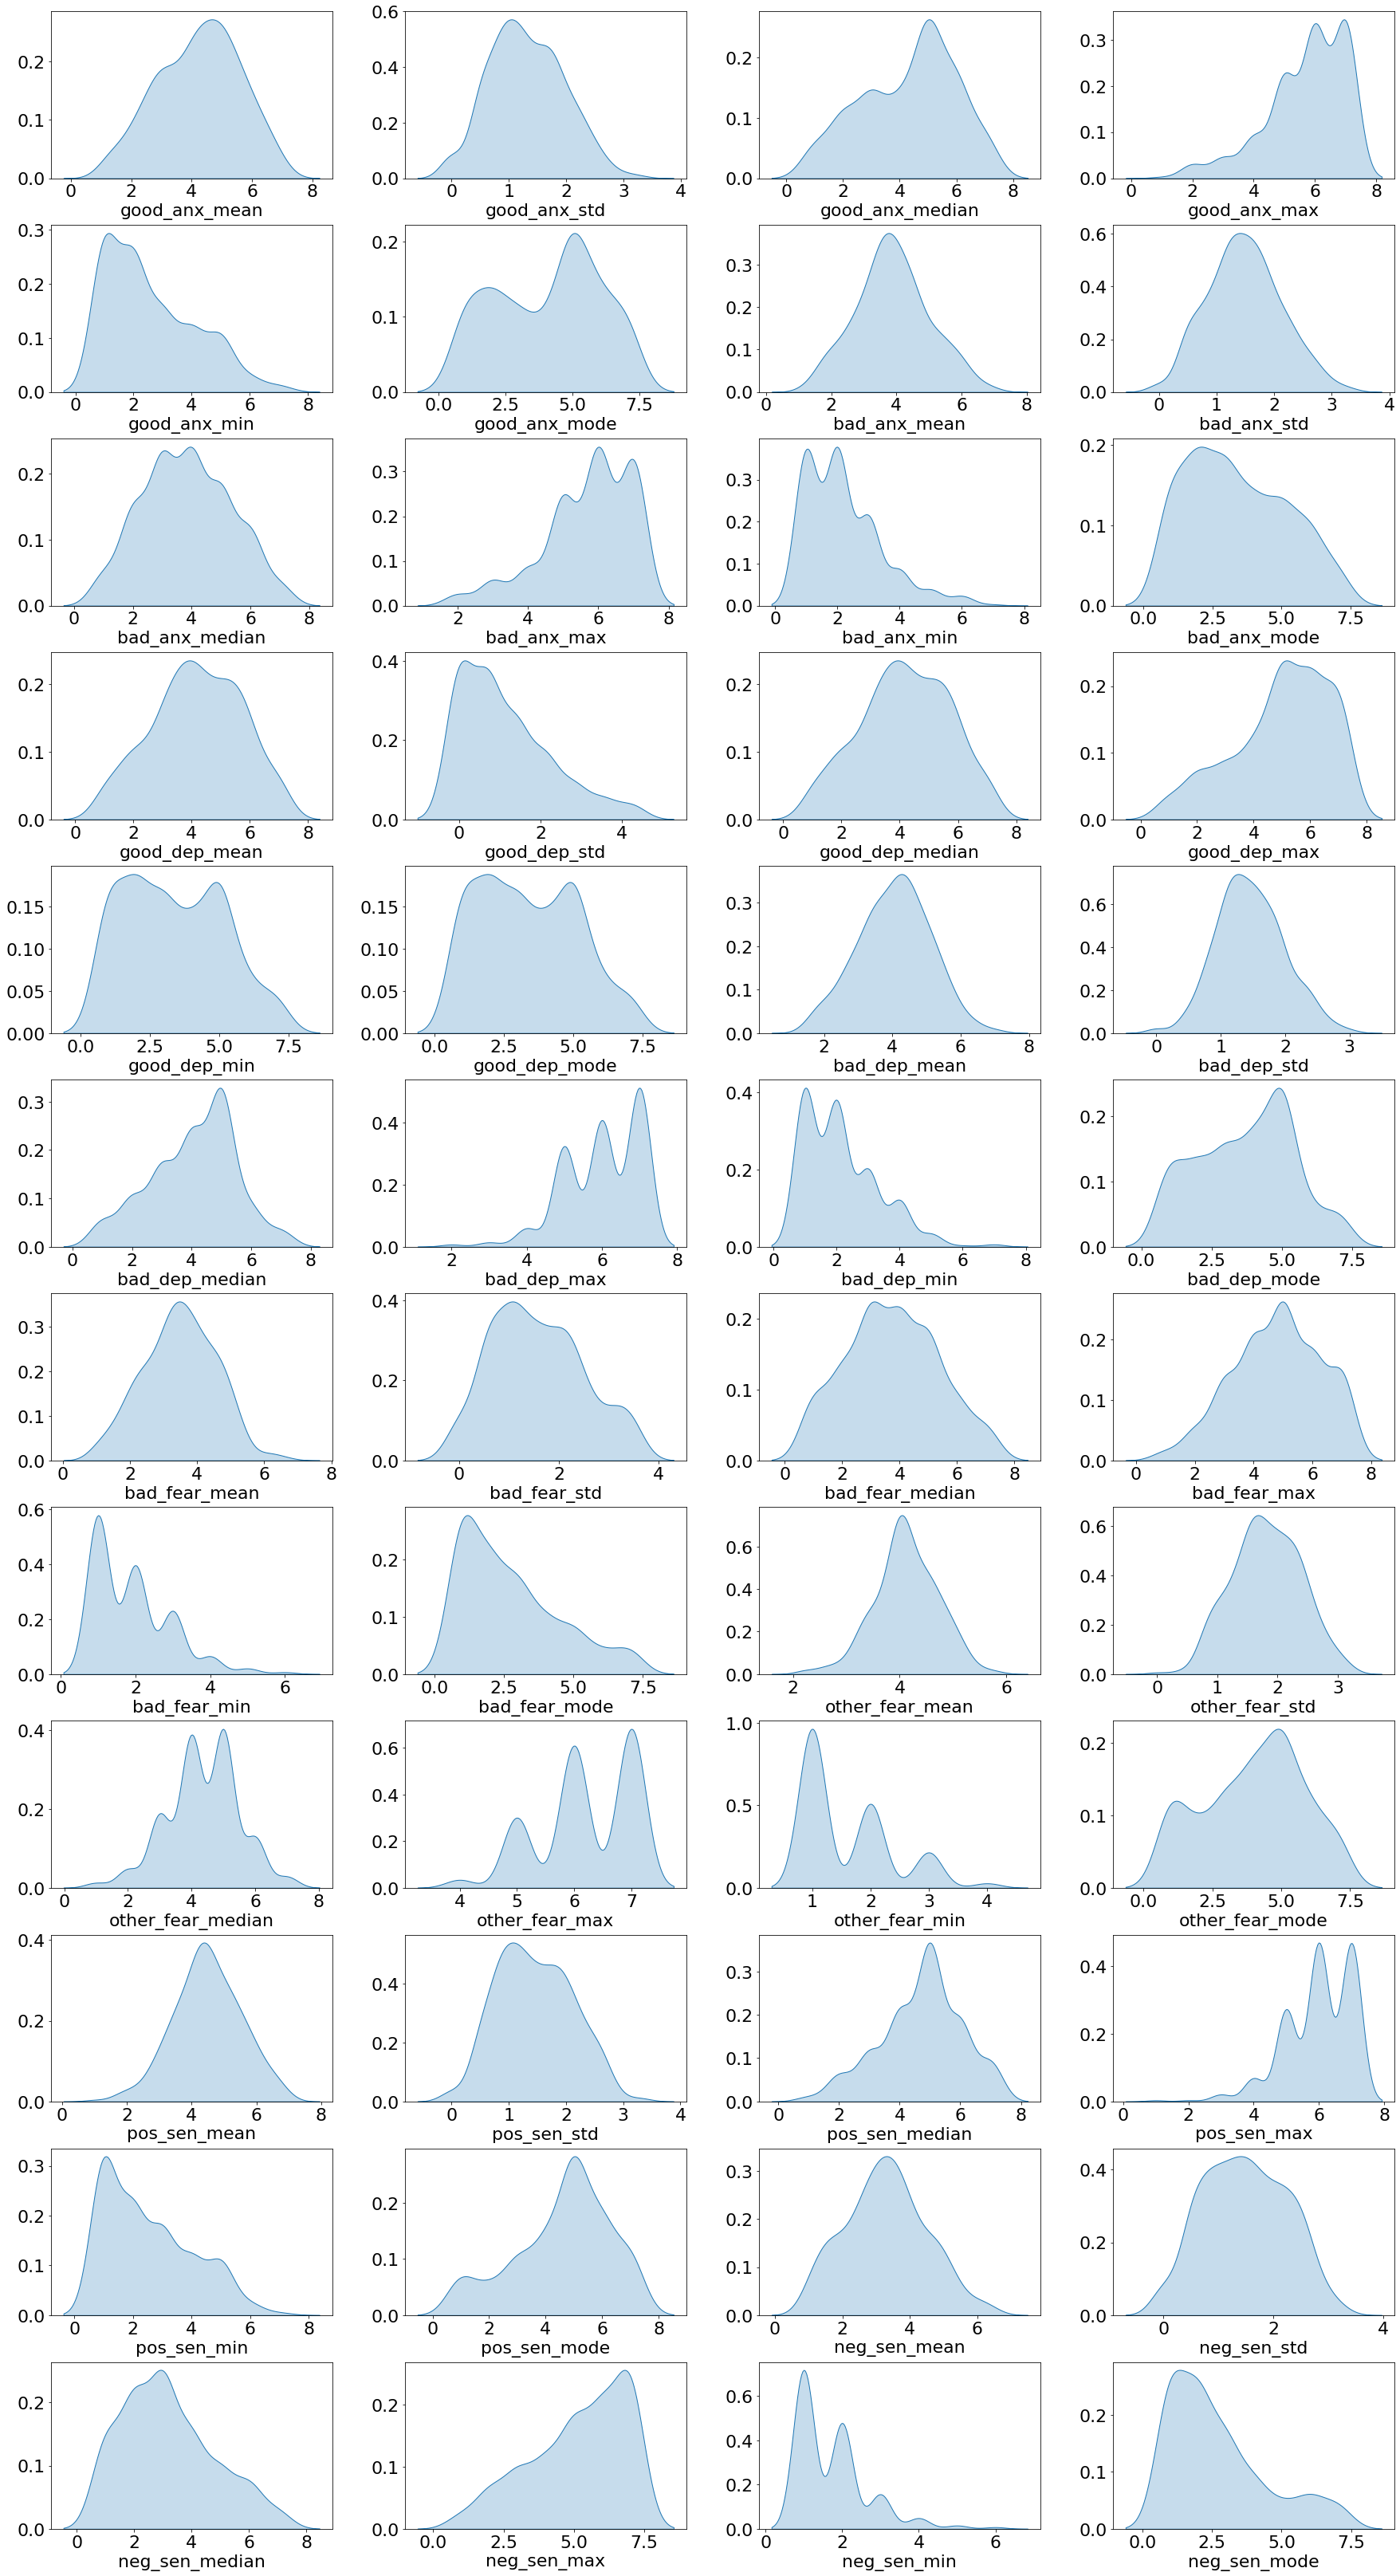

In [85]:
fig, axs = plt.subplots(12, 4, figsize=(25,45))
plt.tight_layout()

row = 0
col = 0
for i in range(48):
    if col == 4:
        row += 1
        col = 0
    sns.kdeplot(x=preprocess.iloc[:,i], fill=True, ax=axs[row][col])
    axs[row][col].set_xlabel(preprocess.columns[i])
    axs[row][col].set_ylabel('')
    col+=1
plt.show()

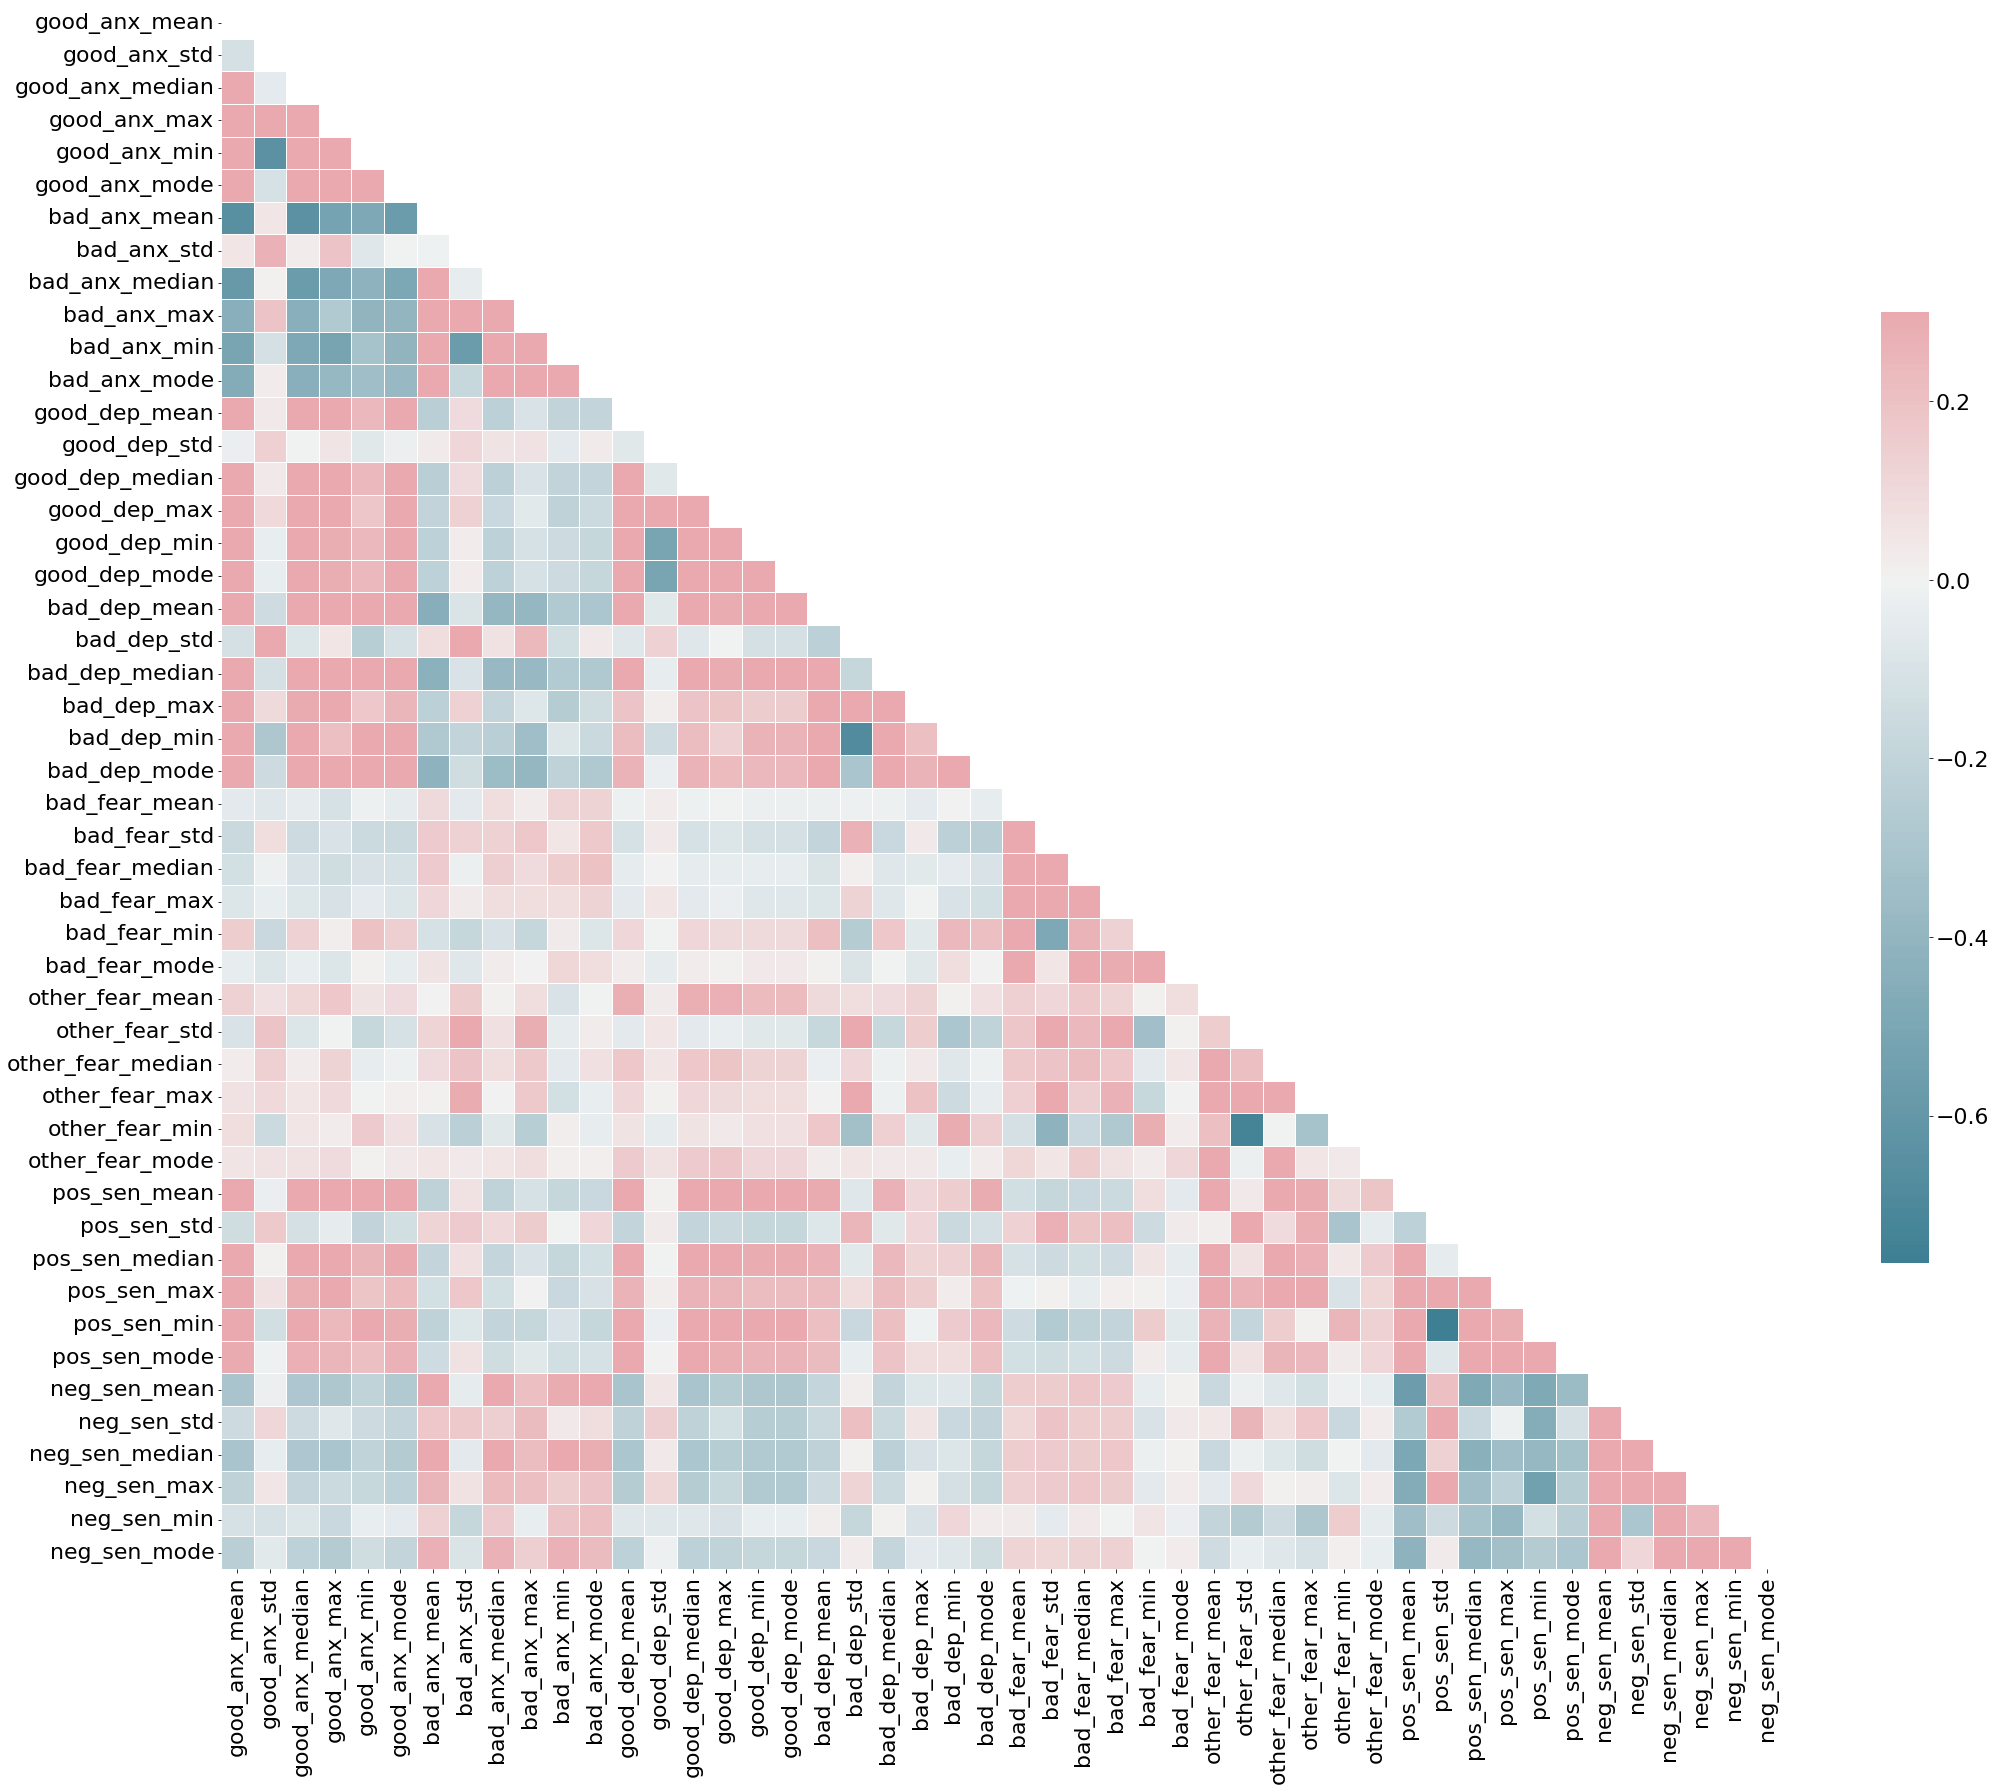

In [86]:
# Compute the correlation matrix
corr = preprocess.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(35, 35))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# 3.6 Preprocess_2 EDA

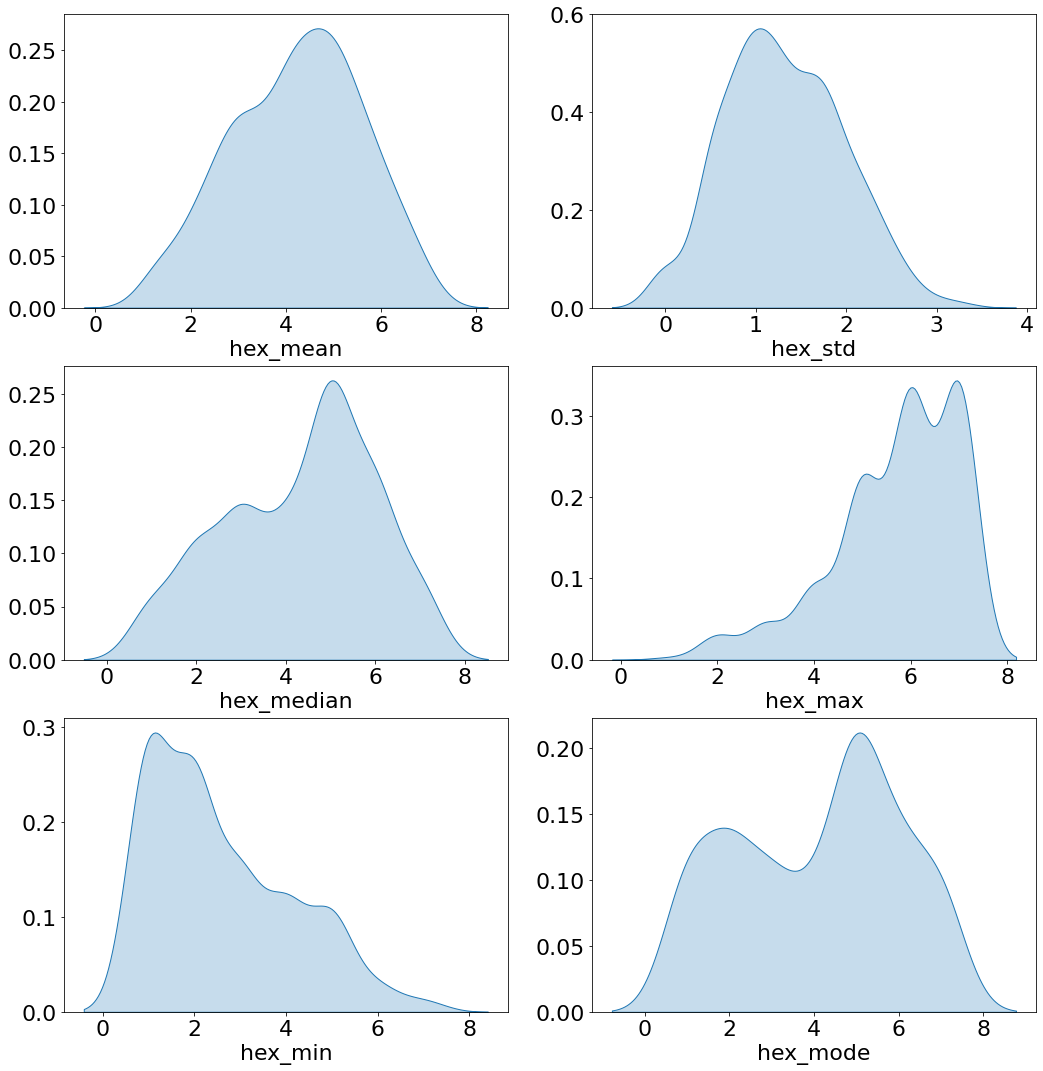

In [87]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
plt.tight_layout()

row = 0
col = 0
for i in range(6):
    if col == 2:
        row += 1
        col = 0
    sns.kdeplot(x=preprocess_2.iloc[:,i], fill=True, ax=axs[row][col])
    axs[row][col].set_xlabel(preprocess_2.columns[i])
    axs[row][col].set_ylabel('')
    col+=1
plt.show()

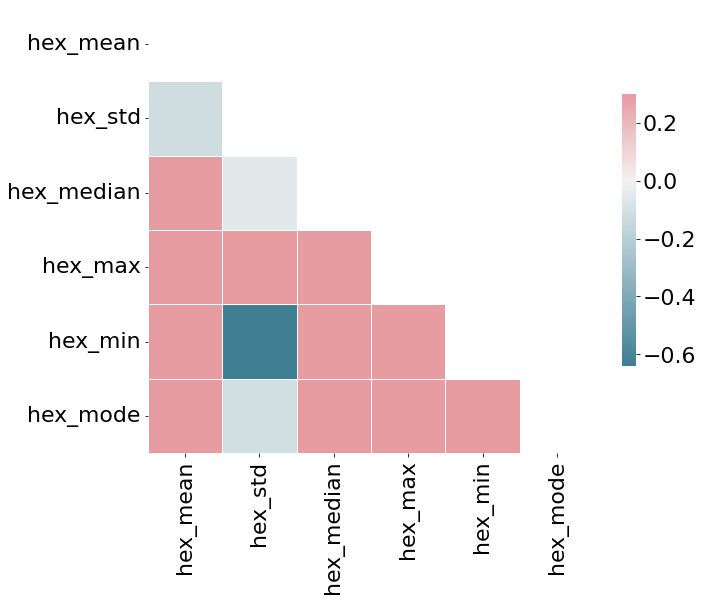

In [88]:
# Compute the correlation matrix
corr = preprocess_2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# 4. Cluster

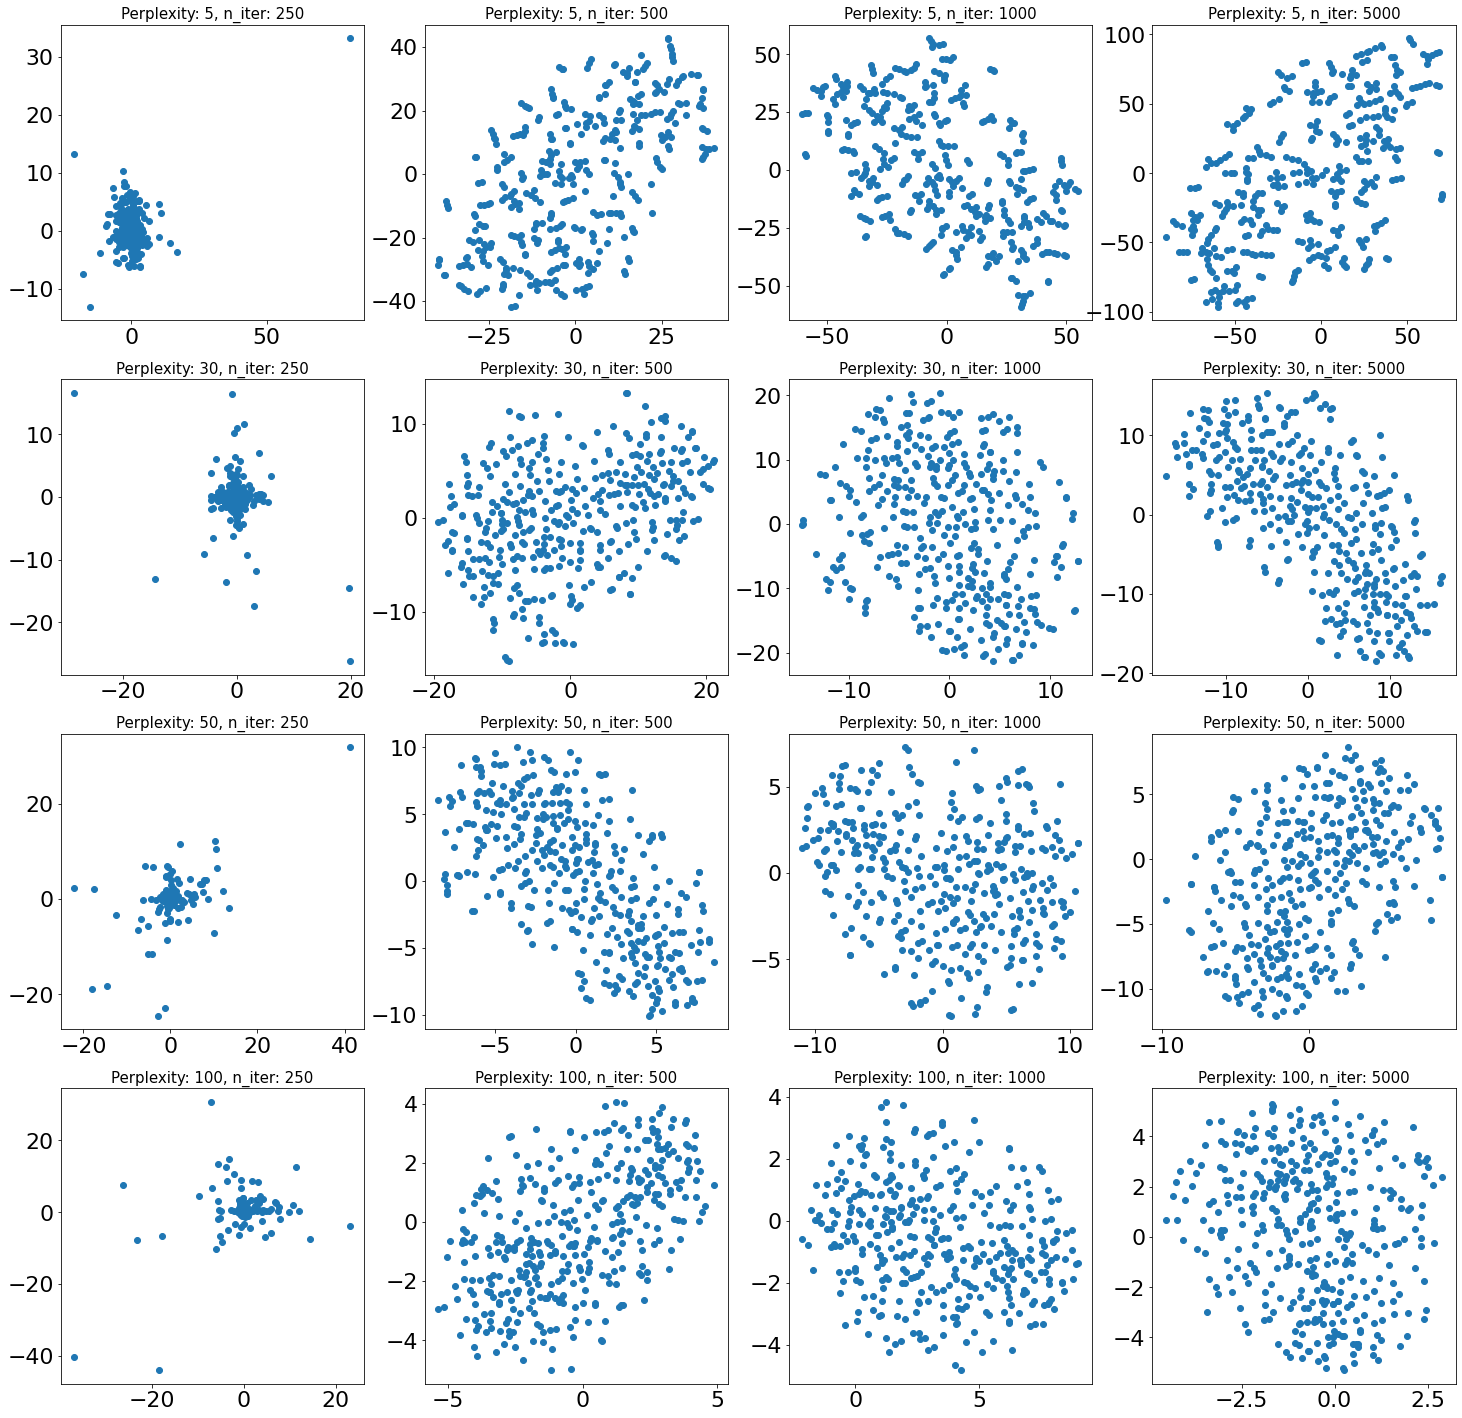

In [89]:
from sklearn.manifold import TSNE
import warnings 
warnings.filterwarnings(action='ignore')

fig, axs = plt.subplots(4, 4, figsize=(25, 25))

perplexities = [5, 30, 50, 100]
n_iters = [250, 500, 1000, 5000]

for i, perplexity in enumerate(perplexities):
    for j, n_iter in enumerate(n_iters):
        tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter)
        tsne_results = tsne.fit_transform(preprocess)
        axs[i, j].scatter(tsne_results[:, 0], tsne_results[:, 1])
        axs[i, j].set_title(f'Perplexity: {perplexity}, n_iter: {n_iter}', fontsize=15)

plt.show()

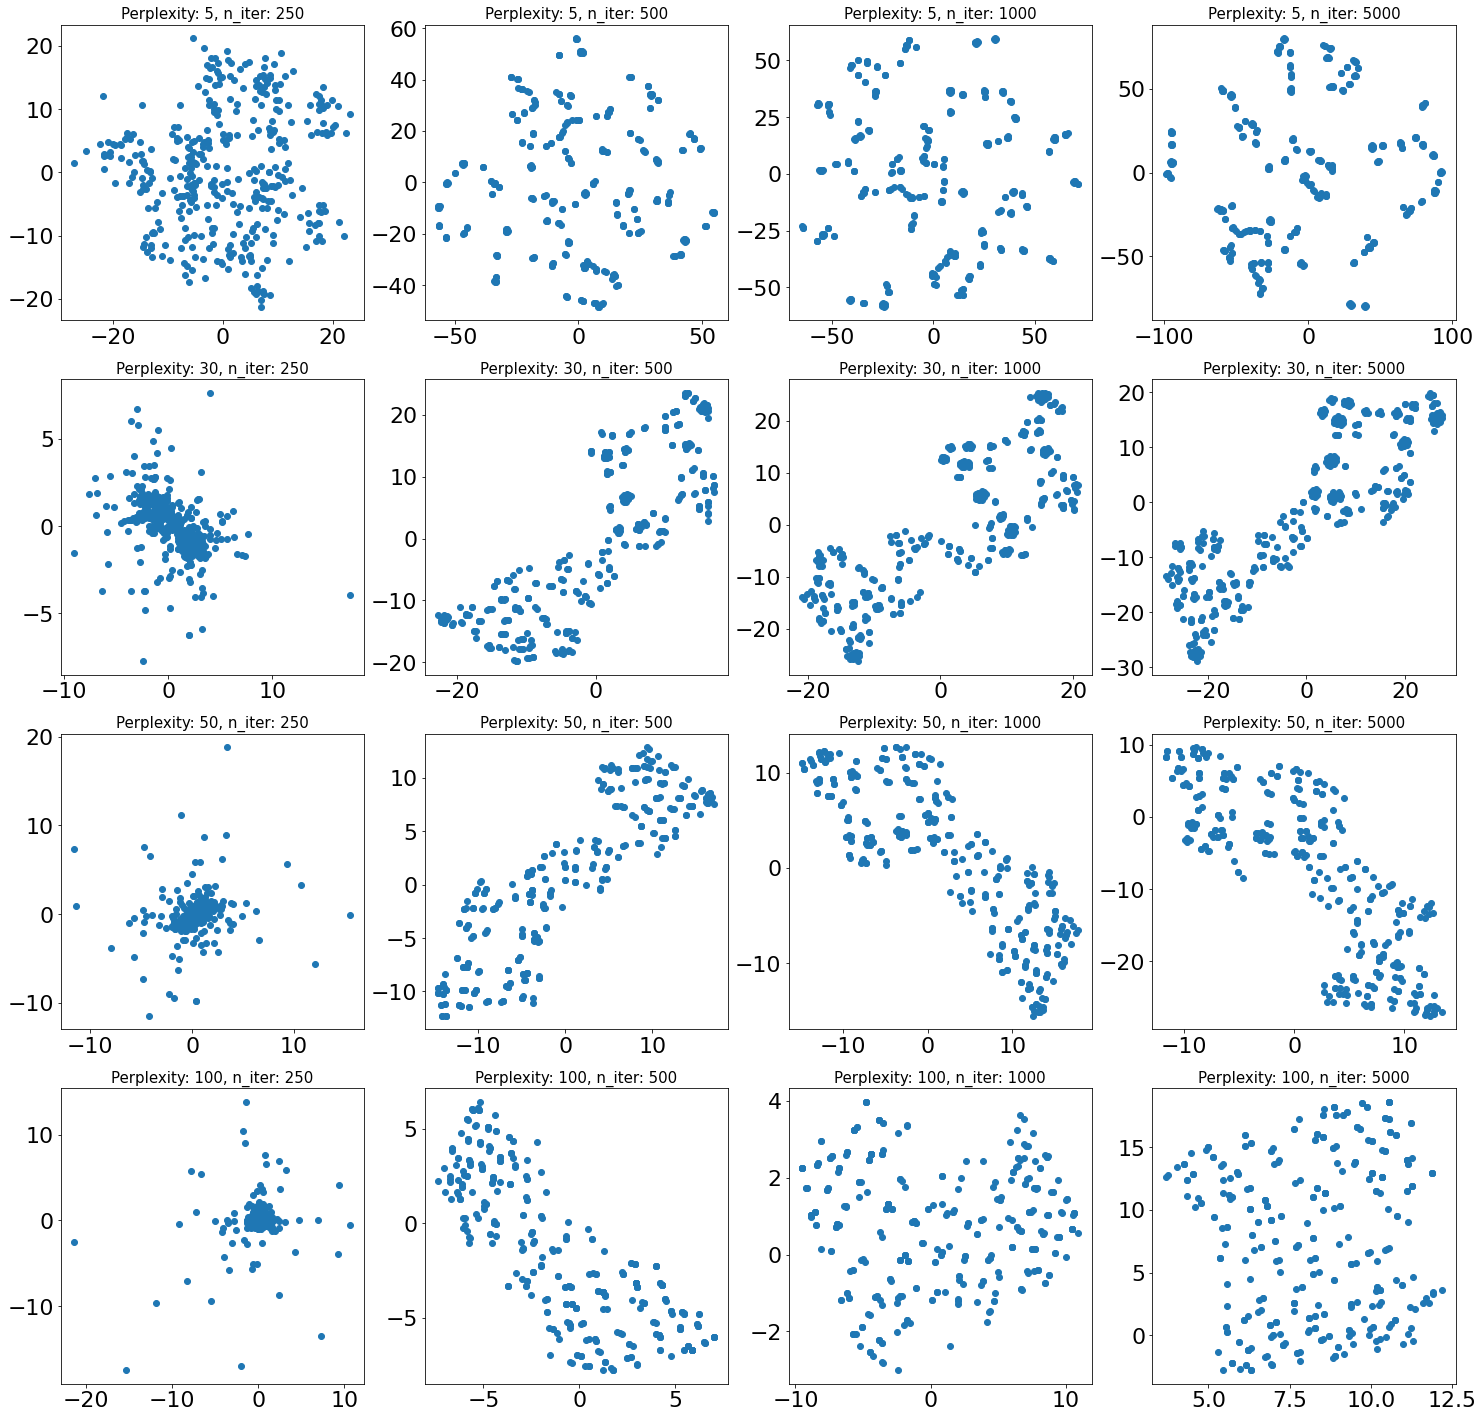

In [90]:
fig, axs = plt.subplots(4, 4, figsize=(25, 25))

perplexities = [5, 30, 50, 100]
n_iters = [250, 500, 1000, 5000]

for i, perplexity in enumerate(perplexities):
    for j, n_iter in enumerate(n_iters):
        tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter)
        tsne_results = tsne.fit_transform(preprocess_2)
        axs[i, j].scatter(tsne_results[:, 0], tsne_results[:, 1])
        axs[i, j].set_title(f'Perplexity: {perplexity}, n_iter: {n_iter}', fontsize=15)

plt.show()

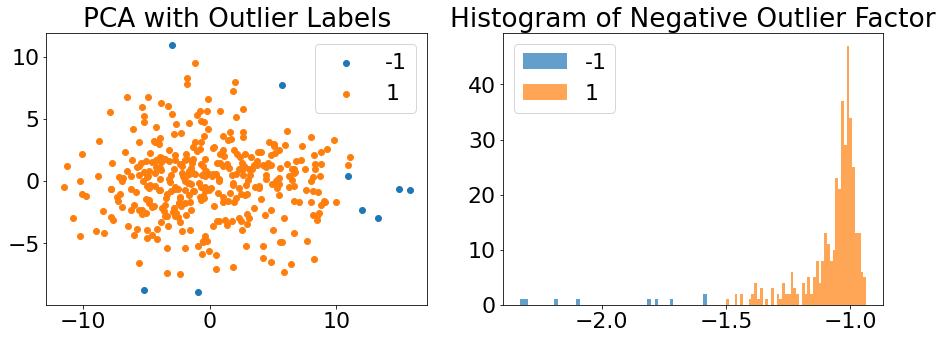

In [114]:
from sklearn.decomposition import PCA

# Create PCA object and fit to preprocessed data
pca = PCA(n_components=2)
pca_results = pca.fit_transform(preprocess)

# Create LOF object and fit to PCA results
lof = LocalOutlierFactor(n_neighbors=9, contamination='auto')
lof.fit(pca_results)

# Predict outlier labels using LOF
outlier_labels = lof.fit_predict(pca_results)

# Plot PCA with outlier labels
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for label in np.unique(outlier_labels):
    indices = np.where(outlier_labels == label)[0]
    axs[0].scatter(pca_results[indices, 0], pca_results[indices, 1], label=label)
    axs[1].hist(lof.negative_outlier_factor_[indices], bins=50, label=label, alpha=0.7)

axs[0].set_title('PCA with Outlier Labels')
axs[1].set_title('Histogram of Negative Outlier Factor')

axs[0].legend()
axs[1].legend()
plt.show()


# 5. Conclusion

There are many observation to write down from each of the plots in EDA section of this notebook. However, I assume it wouldn't be needed as all of us do not need basic observation of visualizations. 

However, in the clustering section, there are significant conclusions to be made. They are as follows:
* The goal of this notebook is to find student who need immediate mental health support. I assume that, these kinds of students would be classified as outliers since most of the students aren't in a serious situations. Many people have mental health issues but only few have situations so bad, it is an emergency. 
* Using the above logic, the students who would need support would be statistically considered as outliers. Since we do not have the information on this topic, it would be best to use any unsupervised classification technique. 
* In this notebook, I have only visualized the data. I have not dug deeper, there is scope for improvement where you can identify the student id, making necessary changes as required.
* In the visualizations of clusters, we can clearly see patterns how there are outliers when the number of iterations is 250. These might be the students who would need immediate assistance.

Please let me know any improvements or comments on this notebook. Feel free to copy the notebook and codes if you want to continue investigation in this topic.

Also please note that my preprocess data is purely based on my assumptions and opinions. I am not an expert in this field so do not consider my preprocess dataframes are perfect.

Thank you,
**Vijeth Rai**